#Introduction to Tensors

In [1]:
import numpy as np

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#creating tensors with tf.constant()
scalar =  tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#checking the dimension
scalar.ndim

0

In [ ]:
#create a vector
vector =  tf.constant([10,10,20,20])
vector

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 10, 20, 20], dtype=int32)>

In [ ]:
#checking the dimension
vector.ndim

1

In [ ]:
#create a matrix
matrix =  tf.constant([[1,2,3],[4,5,6]])
matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
matrix.ndim   #total no of dimensions is the no. of elements in shape()

2

In [ ]:
#create a matrix with custom datatype
matrix1 = tf.constant([[10.,7.],
                       [3.,5.],
                       [2.,4.]], dtype = tf.float16)
matrix1

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  5.],
       [ 2.,  4.]], dtype=float16)>

In [ ]:
matrix1.ndim

2

In [ ]:
#creating a tensor
tensor = tf.constant([[[1,2,3],
                        [4,5,6]],
                       [[7,8,9],
                        [10,11,12]],
                       [[13,14,15],
                        [17,18,19]]])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [17, 18, 19]]], dtype=int32)>

In [ ]:
tensor.ndim

3

1. Scalar :  a single number
2. Vector :  a number with direction ( Eg: windspeed and direction)
3. Matrix : a 2-dimensional array of numbers
4. Tensor : an N-dimensional array of numbers ( where n can be any value)

In [ ]:
#Creating tensors using tf.Variable
#create the 2 vectors one using tf.Variable and the other using tf.constant

var_tensor =  tf.Variable([10,7])
cons_tensor =  tf.constant([10,7])

var_tensor,cons_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
#let's try item reassignment on var_tensor
var_tensor[0] =  7

TypeError: ignored

In [ ]:
#We can debug the above error using assign()
var_tensor[0].assign(7)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
#let's try the same for cons_tensor
cons_tensor[0]  = 7

TypeError: ignored

In [ ]:
#Let's see if assign() resolves the above error
cons_tensor[0].assign(7)

AttributeError: ignored

# Learnings:
1. Item reassignment is possible for a tensor created using tf.Variable() with the help of assign()
2.  Item reassignment is not possible for a tensor created using tf.constant()

#Creating random tensors

Random tensors are tensors of arbitary size containing random numbers.

In [ ]:
#creating 2 random (but same) tensors
random_1 =  tf.random.Generator.from_seed(42)  # we set seed for reproducibilty
random_1 = random_1.normal(shape = (3,2))  #tf.random.normal outputs random values from a normal distribution

random_2 =  tf.random.Generator.from_seed(42) 
random_2 = random_2.normal(shape = (3,2))  

random_1, random_2 , random_1 == random_2  # checking if equal


(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

## Shuffling tensors

Why would we do that?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

In [ ]:
#shuffling a tensor (valuable when you want to shuffle a data so that the inherent(natural) order doesn't impact the learning of your model)
not_shuffled =  tf.constant([[10,7],
                             [3,4],
                             [2,5]])


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [ ]:
tf.random.shuffle(not_shuffled) #we get different results each time

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

Wait... why didn't the numbers come out the same?

It's due to rule #4 of the tf.random.set_seed() documentation.

> "4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

tf.random.set_seed(42) sets the global seed, and the seed parameter in tf.random.shuffle(seed=42) sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."

In [ ]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42) #The results are same everytime

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

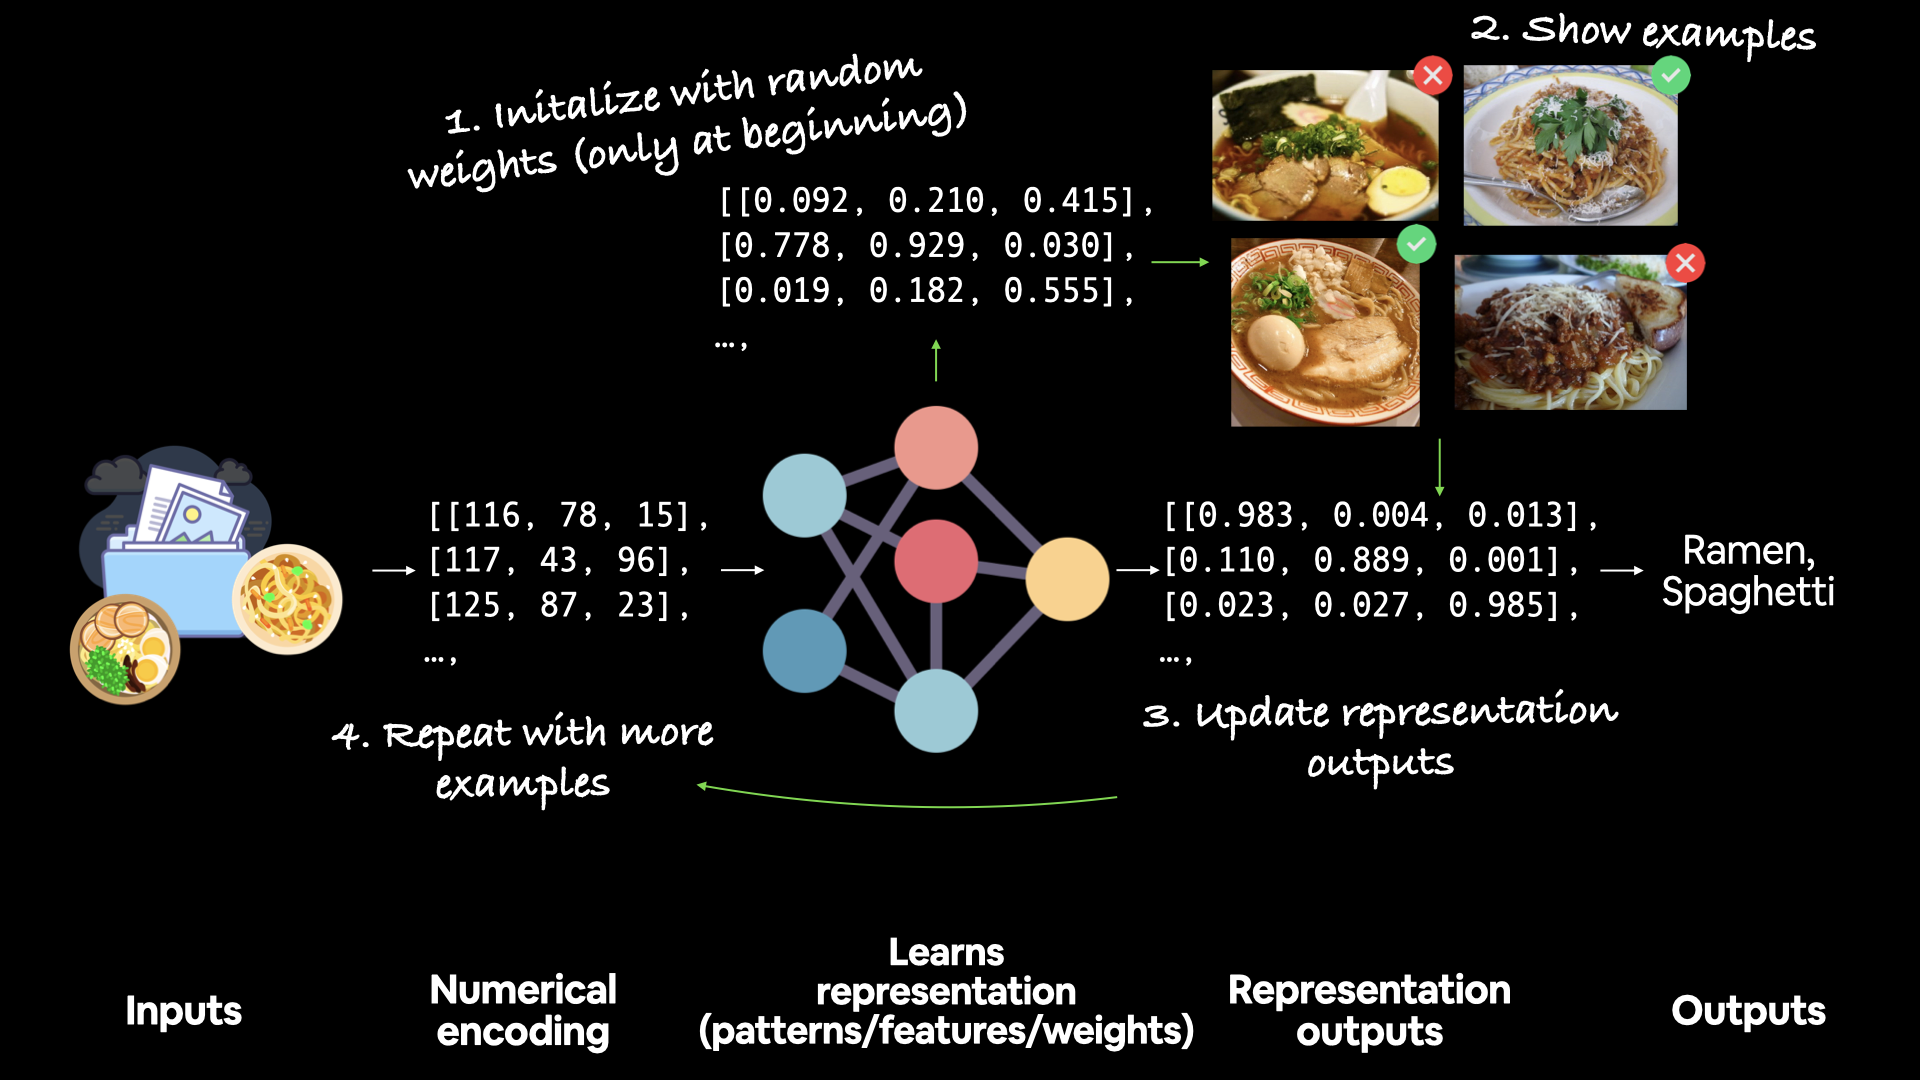

# Other ways to make tensors
Though you might rarely use these (remember, many tensor operations are done behind the scenes for you), you can use tf.ones() to create a tensor of all ones and tf.zeros() to create a tensor of all zeros.

In [ ]:
# Make a tensor of all ones
tf.ones(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
tf.ones([3,2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Make a tensor of all zeros
tf.zeros(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>


You can also turn NumPy arrays in into tensors.

Remember, the main difference between tensors and NumPy arrays is that tensors can be run on GPUs.

>  Note: A matrix or tensor is typically represented by a capital letter (e.g. X or A) where as a vector is typically represented by a lowercase letter (e.g. y or b).

In [ ]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
A = tf.constant(numpy_A,  
                shape=[2, 4, 3]) # note: the shape total (2*4*3) has to match the number of elements in the array,i.e, 24.
numpy_A, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]], dtype=int32)>)

In [ ]:
A.ndim

3

In [ ]:
B = tf.constant(numpy_A,shape = [8,3])

In [ ]:
B

<tf.Tensor: shape=(8, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]], dtype=int32)>

In [ ]:
B.ndim

2

#Getting information from tensors

* shape - tensor.shape
* rank - tensor.ndim
* axis or dimension - tensor[0] or tensor[:,1]
* size - tf.size(tensor)


In [ ]:
 #creating a tensor having rank 4
 rank_4 = tf.ones(shape = [2,3,4,5])

In [ ]:
rank_4

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
rank_4.ndim

4

In [ ]:
rank_4.shape

TensorShape([2, 3, 4, 5])

In [ ]:
tf.size(rank_4)

<tf.Tensor: shape=(), dtype=int32, numpy=120>

In [ ]:
rank_4[0][0]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
#Printing varoius attributes of rank_4 tensor
print("Datatype of each element:", rank_4.dtype  )
print("No. of dimensions:", rank_4.ndim)
print("Shape of tensor:", rank_4.shape)
print('total no of elements:', tf.size(rank_4).numpy())
print('Elements along 0 axis:', rank_4.shape[0])
print('Elements along last axis:', rank_4.shape[-1])

Datatype of each element: <dtype: 'float32'>
No. of dimensions: 4
Shape of tensor: (2, 3, 4, 5)
total no of elements: 120
Elements along 0 axis: 2
Elements along last axis: 5


#Indexing tensors

We can index tensors just like Python lists

In [ ]:
#Get the first 2 elements of each dimensions (2,3,4,5)
rank_4[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]], dtype=float32)>

In [ ]:
#Get the first element from each dimension from each index expect for final one
rank_4[:1,:1,:1,]

#or

rank_4[:1,:1,:1,:]   #both yield the same result

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[1., 1., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
#Get the first element from each dimension from each index expect for second last one
rank_4[:1,:1,:,:1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[1.],
         [1.],
         [1.],
         [1.]]]], dtype=float32)>

In [ ]:
rank_4[:1,:,:1,:1]

<tf.Tensor: shape=(1, 3, 1, 1), dtype=float32, numpy=
array([[[[1.]],

        [[1.]],

        [[1.]]]], dtype=float32)>

In [ ]:
rank_4[:,:1,:1,:1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[1.]]],


       [[[1.]]]], dtype=float32)>

In [ ]:
rank_2 =  tf.constant([[10,7],
                       [3,4]])

In [ ]:
rank_2.ndim

2

In [ ]:
rank_2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
#get the last item of each of row our rank_2 tensor
rank_2[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Expanding the dimension of a tensor (helpful when we need to alter the size of our tensors in our NN model)
#Method one using tf.newaxis
rank_3 =  rank_2[...,tf.newaxis]

In [ ]:
rank_3

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Method 2 using tf.expand_dims()
rank_3 =  tf.expand_dims(rank_2, axis = -1)  #Here -1 means expand on the final axis

In [ ]:
rank_3

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
#Expand @ axis = 0
tf.expand_dims(rank_2, axis = 0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [ ]:
#Expand @ axis = 1
tf.expand_dims(rank_2, axis = 1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 3,  4]]], dtype=int32)>

##  Manipualting tensors ( Tensor operations )

In [ ]:
# Basic operations or element-wise operations such as (+,-,*,/)

rank_2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
rank_2 + 10   #Note: All these operations are not inplace operations,i.e, the value of original tensor remains unchanged

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
rank_2 *45

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[450, 315],
       [135, 180]], dtype=int32)>

In [ ]:
rank_2 -20

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-10, -13],
       [-17, -16]], dtype=int32)>

In [ ]:
rank_2 /2

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[5. , 3.5],
       [1.5, 2. ]])>

In [ ]:
# You can use the built-in tensorflow function also
tf.multiply(rank_2, 45) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[450, 315],
       [135, 180]], dtype=int32)>

In [ ]:
tf.add(rank_2,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
tf.subtract(rank_2, 20)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-10, -13],
       [-17, -16]], dtype=int32)>

In [ ]:
tf.divide(rank_2,2)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[5. , 3.5],
       [1.5, 2. ]])>

🔑  (To use emojis in this text block press 'start + >' and choose emoji of your choice )


**Matrix Multiplication**

In ML, matrix mult. is one of the most common tensor operation

http://matrixmultiplication.xyz/

In [ ]:
#using "@" python operator
rank_2 @ rank_2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
rank_2 * rank_2  #The output is not same as the other because "*" is a element-wise operation

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
#using tf.matmul()
tf.matmul(rank_2,rank_2)  # Here dimension of both the matrices,i.e, rank_2 is same

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
#Above dimension of both the matrices,i.e, rank_2 is same, let's multiply matrices with diff. dimensions
X  =  tf.constant([[1,2],
              [3,4],
              [5,6]])                

In [ ]:
Y =  tf.constant([[7,8],
              [9,10],
              [11,12]])     

In [ ]:
X,Y  

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
X @ Y

InvalidArgumentError: ignored

In [ ]:
#resolving the above error
X @ tf.reshape(Y,[2,3]) #We reshape Y, so that rules of matrix multiplication are obeyed,i.e, the inner dimension of the matrices 
                        # should be same. 

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

* Transpose: flips the axis, the row and column  dimension are interchanged.
* Reshape: re-shuffle the tensor to get the desired shape

In [ ]:
#We can also perform matrix mul. using tf.transpose(), the shape of the resulting matrix may differ
tf.transpose(X) @ Y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**dot product**

Matrix multiplication is also referred as dot product.
We can perform the matrix multiplication using:
* `@ opeartor`
* `tf.matmul()`
* `tf.tensordot()`

In [ ]:
#To perform dot product on X and Y  ( it require X or Y to be reshaped/transposed as seen earlier)
tf.tensordot(tf.transpose(X), Y , axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
#Transpose Y  ---- 1
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
#Reshape Y ---- 2
X @ tf.reshape(Y, shape = (2,3))
#Results of 1 and 2 are different

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
#Print Y, transpose Y and reshaped Y to check the difference in the answers
print("The original Y:")
print(Y, '\n')

print("Transpose Y:")
print(tf.transpose(Y),'\n')

print("Reshaped Y (shape = (2,3)):")
print(tf.reshape(Y,shape = (2,3)))

The original Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Transpose Y:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32) 

Reshaped Y (shape = (2,3)):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32)


Generally, when the axes don't line up we use transpose to fix the issue rather than reshape.

## Changing datatype of tensors

In [ ]:
#change float32  tensor to float16 tensor (reduced precision)
A =  tf.constant([1.4,4.5])

In [ ]:
A.dtype

tf.float32

In [ ]:
A = tf.cast(A,dtype =  tf.float16)
A.dtype

tf.float16

In [ ]:
# Changing int32 to float32
B =  tf.constant([10,7])
B.dtype

tf.int32

In [ ]:
B

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([10.,  7.], dtype=float32)>

In [ ]:
B = tf.cast(B, dtype =  tf.float32)
B.dtype

tf.float32

In [ ]:
B

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([10.,  7.], dtype=float32)>

**Aggregating Tensors**

Aggregation : Taking multiple inputs and giving out a single output

Tensor aggregation functions:
* Minimum
* Maximum
* Mean
* Sum
* Variance
* Standard Deviation

In [ ]:
#Get absolute value
t = tf.constant([-7,-10])

In [ ]:
tf.abs(t)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [ ]:
import numpy as np

In [ ]:
#Creating a tensor of size 50 having random values between 0 to 100
random_tensor =  tf.constant(np.random.randint(0,100, size = 50))

In [ ]:
random_tensor

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([69, 61, 69, 35, 23, 40, 23, 55, 60, 72, 98, 15, 44, 46, 54, 17, 32,
       54, 40, 25, 76, 98, 91, 88, 39, 73, 46,  5, 30, 54, 50,  7, 71, 53,
       16, 84, 75, 57, 47, 99,  9, 79, 27, 99, 22,  5, 86,  1, 62, 21])>

In [ ]:
#Min
tf.reduce_min(random_tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
#Max
tf.reduce_max(random_tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [ ]:
#Mean
tf.reduce_mean(random_tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=50>

In [ ]:
#Sum
tf.reduce_sum(random_tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=2502>

In [ ]:
#TensorFlow Probability is a library for probabilistic reasoning and statistical analysis.
import tensorflow_probability as tfp

In [ ]:
#Variance
tfp.stats.variance(random_tensor)

<tf.Tensor: shape=(), dtype=int64, numpy=776>

In [ ]:
#or
tf.math.reduce_variance(tf.cast(random_tensor, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=776.71844>

In [ ]:
#Std
tfp.stats.stddev(tf.cast(random_tensor, dtype = tf.float64))

<tf.Tensor: shape=(), dtype=float64, numpy=27.86966809992541>

In [ ]:
#or
tf.math.reduce_std(tf.cast(random_tensor, dtype = tf.float32))  

<tf.Tensor: shape=(), dtype=float32, numpy=27.869669>

> For variance and std we need to include the entire module name that is tf.math whereas for other functions we need not.

## Finding the positional maximum and minimum

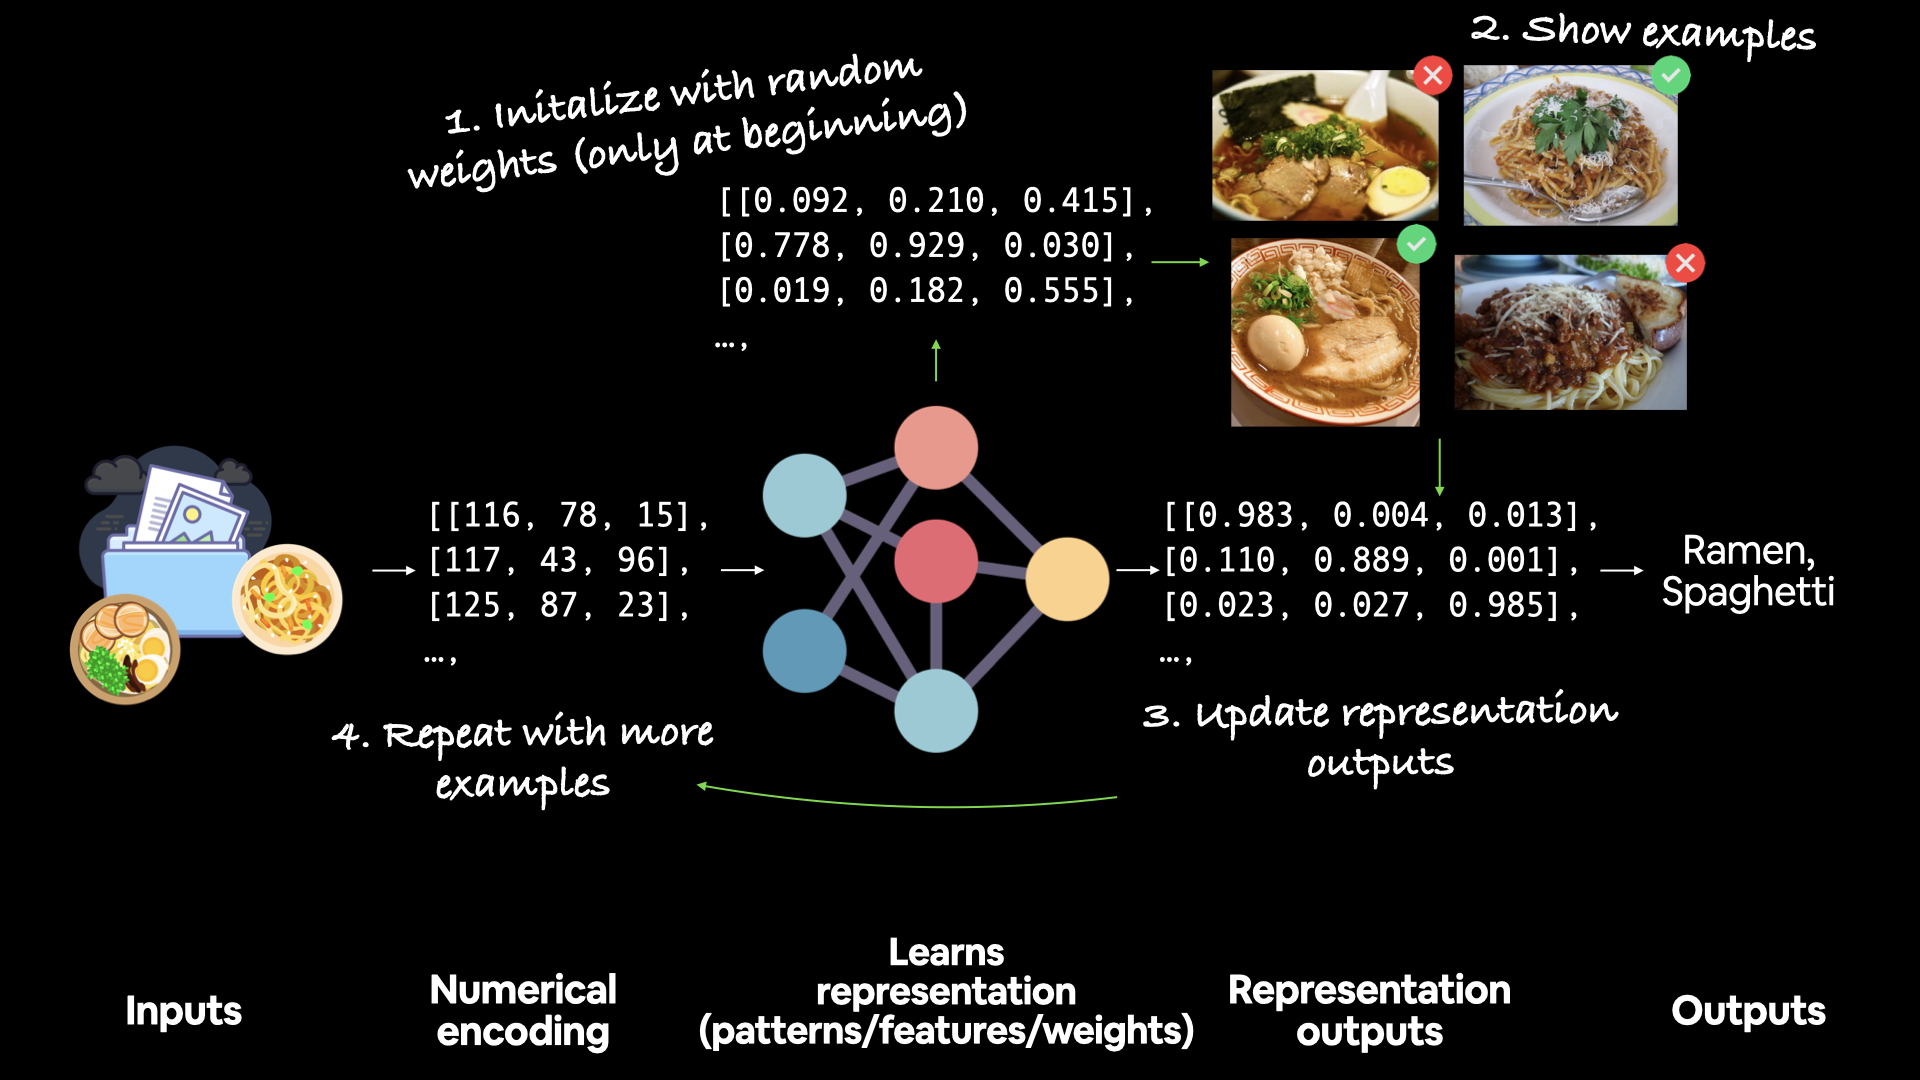

In [ ]:
#Positional min : index of the minimum element in our tensor
b = tf.math.argmin(random_tensor)
c = tf.keras.backend.eval(b)
c

47

In [ ]:
#Positional max : index of the maximum element in our tensor
d =  tf.argmax(random_tensor)
e = tf.keras.backend.eval(d)
e

39

In [ ]:
#Creating a new random tensor to find positional max and min
tf.random.set_seed(42)
random =  tf.random.uniform(shape = [50])
random

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
#Find positional max
tf.argmax(random)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# Checking the value at the index returned by argmax
random[tf.argmax(random)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
#max value
tf.reduce_max(random)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
#checking equality
assert random[tf.argmax(random)] == tf.reduce_max(random)  #Will return error if there is not equality else nothing meaning equality

In [ ]:
#Find positional min
tf.argmin(random)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
# Checking the value at the index returned by argmin
random[tf.argmin(random)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [ ]:
#Checking equality
assert random[tf.argmin(random)] == tf.reduce_min(random)

## Squeezing  a tensor ( removing all single dimensions)

In [ ]:
#Creating a new tensor with multiple single dimensions and then removing them
tf.random.set_seed(42)
T =  tf.constant(tf.random.uniform(shape = [50]), shape = [1,1,1,1,50])

In [ ]:
T

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
T.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
T.ndim

5

In [ ]:
T_squeeze =  tf.squeeze(T)
T_squeeze, T_squeeze.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]))

In [ ]:
T_squeeze.ndim   #Squeezed from rank 5 to rank 1.

1

## One hot encoding tensors

In [ ]:
#Create a list of indices

list1 = [0,1,2,3]   #could be indices of items red - 0,green - 1,blue - 2,yellow - 3

In [ ]:
#One-hot encode our list of indices using tf.one_hot()
tf.one_hot(list1,depth= len(list1))

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
#specify custom values for one-hot encoding
tf.one_hot(list1, depth =  len(list1), on_value= "color" , off_value = "None")  #Use numbers as on and off values for the NN to 
                                                                                #interpret not text

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'color', b'None', b'None', b'None'],
       [b'None', b'color', b'None', b'None'],
       [b'None', b'None', b'color', b'None'],
       [b'None', b'None', b'None', b'color']], dtype=object)>

## Tensorflow and Numpy arrays

tensorflow interacts beautifully with numpy

In [ ]:
#create a tensor from numpy array
T = tf.constant(np.array([3.,7.,8.,10.]))
T

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([ 3.,  7.,  8., 10.])>

In [ ]:
T.dtype

tf.float64

In [ ]:
#converting a tensor to a numpy array
#method1
np.array(T) , type(np.array(T))

(array([ 3.,  7.,  8., 10.]), numpy.ndarray)

In [ ]:
#method 2
T.numpy() , type(T.numpy())

(array([ 3.,  7.,  8., 10.]), numpy.ndarray)

In [ ]:
# The default datatypes of a tensor and tensor created from numpy array are slightly different
J = tf.constant([3.,7.,8.,10.])

In [ ]:
J.dtype, T.dtype  #Here T is tensor created from a numpy array.

(tf.float32, tf.float64)

## Neural Network Regression with Tensorflow

Regression definition in layman terms: predicting a numerical varaible based on some combinations of other variables.
In short, we are predicting a number

In [ ]:
list2 = [4,2,2]
tf.one_hot(list2,depth = max(list2)+1)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)>

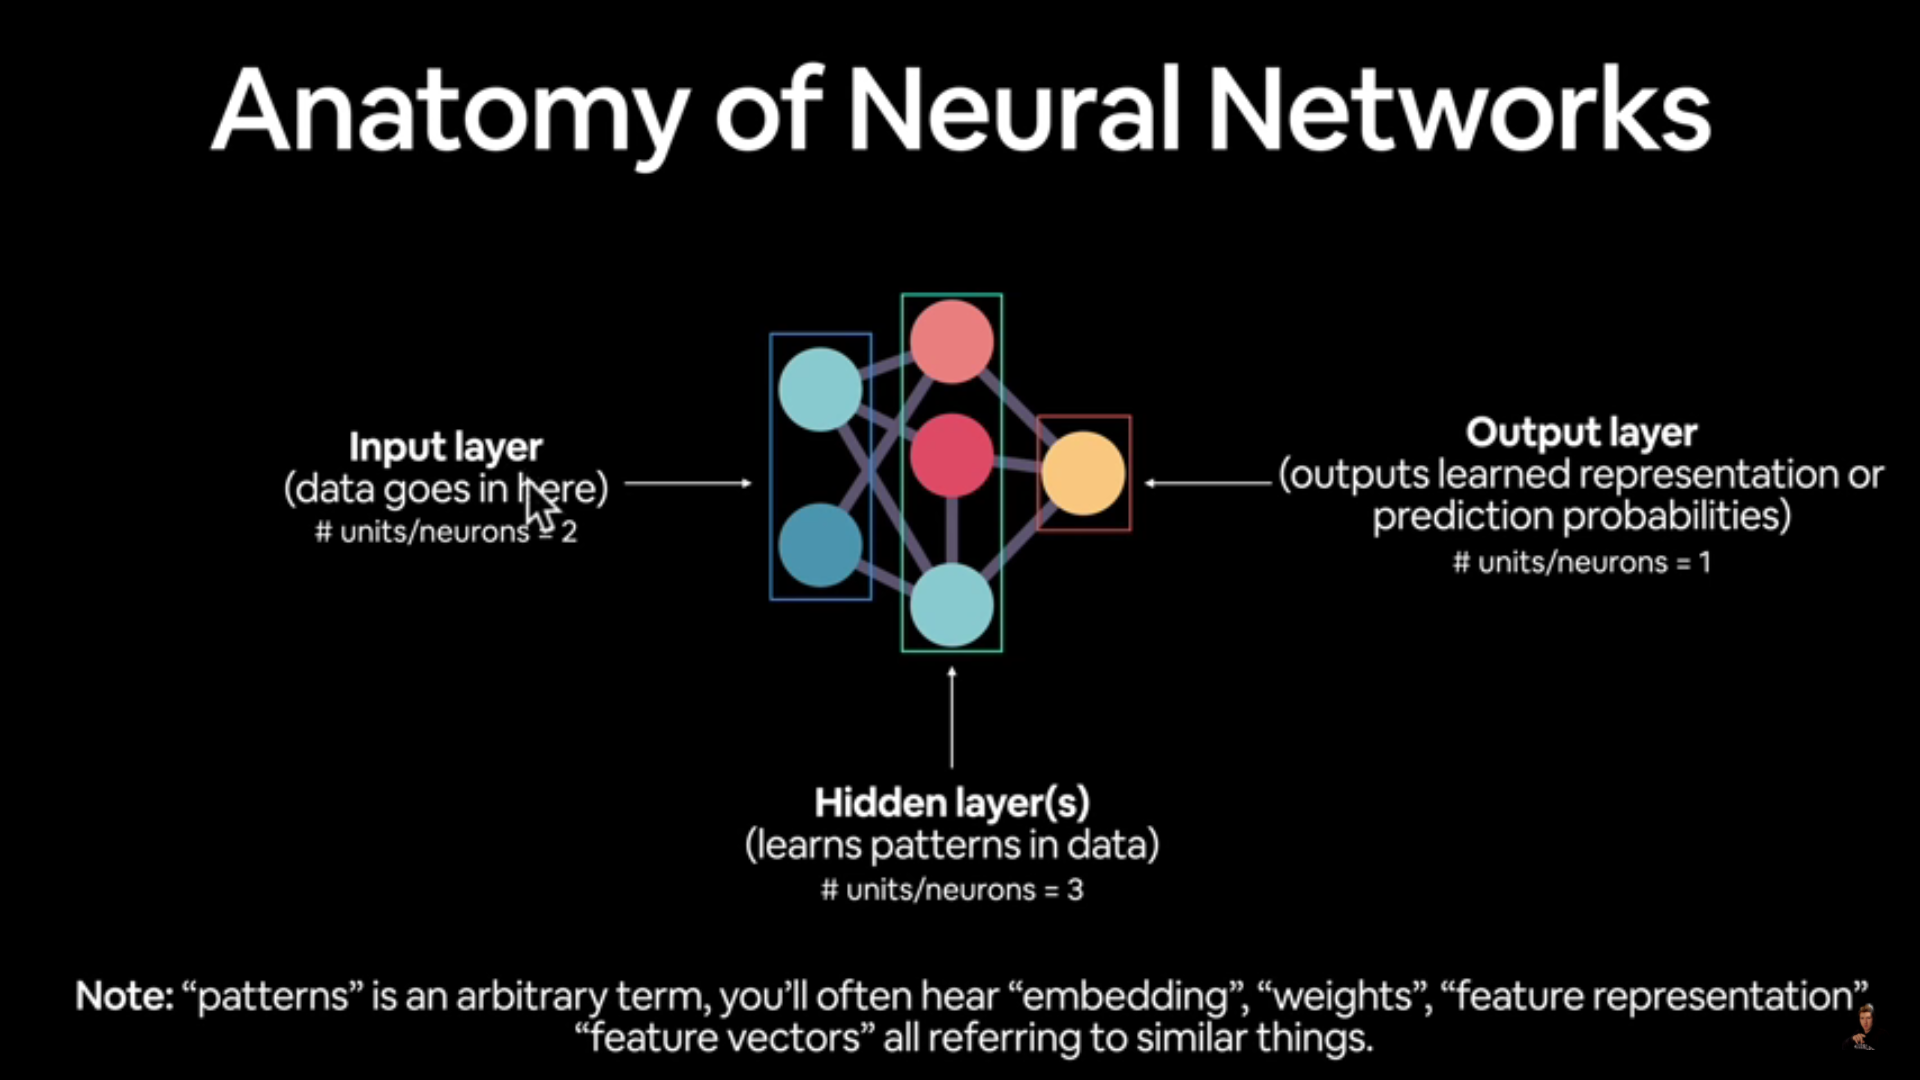

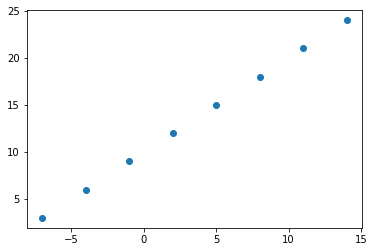

In [ ]:
#Creating data to view and fit
import matplotlib.pyplot as plt
import numpy as np

#predictors
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

#target
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])   

plt.scatter(X,y)   

In [ ]:
#Relationship we are trying to figure out between predictors(X) and target variable(y), so that we predict the actual values of y is:
y ==  X+10


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#Convert numpy arrays to tensors with dtype = float32
X = tf.cast(tf.constant(X), dtype= tf.float32)

y = tf.cast(tf.constant(y), dtype = tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

In [ ]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

**Building a model to interpret the underlying relation between X and Y**

In [ ]:
#Creating a model using sequeential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#Compile our model
model.compile(loss = tf.keras.losses.mae,                     #MAE(Mean absolute error) = mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),          # Tells us on average how wrong is our predictions.
              metrics = ['mae'])

#Fitting our model to our data
model.fit(X,y,epochs =  5)   # Epochs = 5 meaning, we give 5 opportunities to our model to go through all the values of X and Y
                             # and learning the underlying patterns between X and Y

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 10.1587 - mae: 10.1587
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 10.0262 - mae: 10.0262
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 9.8937 - mae: 9.8937
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 9.7612 - mae: 9.7612
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 9.6287 - mae: 9.6287


In [ ]:
#Make a prediction 
model.predict([17.0])       # Based on our relation Y = X+10, output should be 27.


array([[19.254175]], dtype=float32)

The loss and mae values reflect on our model prediction.
As per mae, on average the model prediction will be off by approx. 10 points from the actual prediction (27).

In [ ]:
y_pred = model.predict([17.0]) 
 

array([[29.254175]], dtype=float32)

#Improving our model

In [ ]:
#Rebuilding our model with improvements

In [ ]:
#Creating a model using sequeential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#Compile our model
model.compile(loss = tf.keras.losses.mae,                     
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001),         
              metrics = ['mae'])

#Fitting our model to our data
model.fit(X,y,epochs =  100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 333ms/step - loss: 11.1307 - mae: 11.1307
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1303 - mae: 11.1303
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1298 - mae: 11.1298
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1294 - mae: 11.1294
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1289 - mae: 11.1289
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1285 - mae: 11.1285
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1280 - mae: 11.1280
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1276 - mae: 11.1276
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1271 - mae: 11.1271
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1267 - mae: 11.1267
Epoch 11/100
1/1 [==============================] - 0s 7

In [ ]:
#Make a prediction on the same X value as before 
model.predict([17.0])   #We made it worse than it was before

array([[11.687985]], dtype=float32)

In [ ]:
#let's improve further
X ,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation= None),
        tf.keras.layers.Dense(1)
])

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics = ["mae"])

model.fit(X,y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 482ms/step - loss: 13.7298 - mae: 13.7298
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0522 - mae: 13.0522
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3812 - mae: 12.3812
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7132 - mae: 11.7132
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0447 - mae: 11.0447
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3722 - mae: 10.3722
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6924 - mae: 9.6924
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0018 - mae: 9.0018
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2971 - mae: 8.2971
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5752 - mae: 7.5752
Epoch 11/100
1/1 [==============================] - 0s 9ms/step -

**Best model so far.....**

Improvements in comaprison to the initial model built:
1. Changed epochs from 5 to 100
2. Added another hidden layer with 50 hidden nuerons with no activation function
3. Changed optimizer to Adam with learning_rate also cahnged from 0.0001 to 0.01

Learning rate is the most important hyperparameter for various Neural Networks



In [ ]:
model.predict([17.])   

array([[26.854242]], dtype=float32)

In [ ]:
model.predict([25.])

array([[34.83546]], dtype=float32)

In [ ]:
model.predict([-10.])

array([[-0.08239633]], dtype=float32)

#Evaluating our model

**Workflow of a NN model**

Build model --> fit model --> evaluate model --> tweak model --> fit model --> evaluate model --> tweak model ---> fit model .... so on the process keeps repeating itself until and unless you get a model which captures the true relationship between X and y.



**Most important thing to remember in terms of evaluating a model is:**

> `Visualization`




What to visualise?

* Data - What data we are working with? how does it look?
* Model - What does our model look like?
* Traning of a model - How does out model perform while it learns?
* Prediction -  How do predictions line up against the ground truth a.k.a the original labels

In [ ]:
import tensorflow as tf
#Creating a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Here the relationship between X and Y is same as before (y= X+10)
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
import matplotlib.pyplot as plt


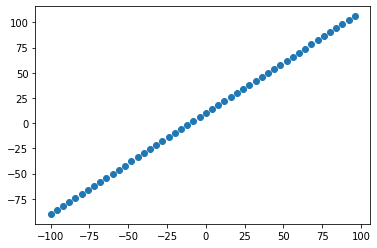

In [ ]:
plt.scatter(X,y)

## The 3 sets:

1. Training - model learns from this dataset (typically 70-80% of the available data)
2. Validation - model is tweaked on this dataset (typically 10-15% of the available data)
3. Test - model is evaluated on this dataset (typically 10-15% of the available data)


**Generalization** - The ability of ML model to perform well on a data it hasn't seen before.

In [ ]:
#Splitting data into train and test data
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]


In [ ]:
len(X_train),len(X_test),  len(y_train),len(y_test)

(40, 10, 40, 10)

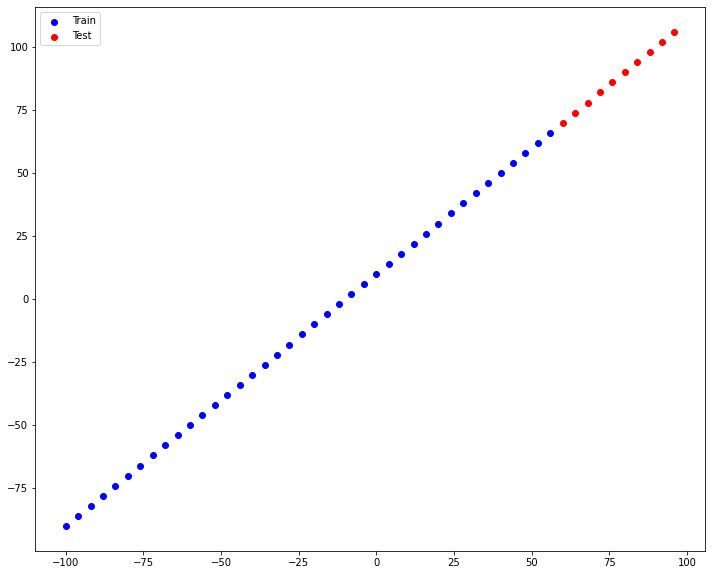

In [ ]:
#Visualizing the train and test data
plt.figure(figsize = (12,10))
plt.scatter(X_train,y_train, c = 'b' , label ='Train') #plot train in blue color
plt.scatter(X_test,y_test, c = 'r' , label ='Test') #plot test in red color
plt.legend();

In [ ]:
#Creating a model 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#Compile our model
model.compile(loss = tf.keras.losses.mae,                     
              optimizer = tf.keras.optimizers.SGD(),         
              metrics = ['mae'])

# #Fitting our model to our data
# model.fit(X,y,epochs =  5)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
#To resolve the above error, let's create a model which builds automatically by the input_shape argument
tf.random.set_seed(42) # For reproducibility

#Create a model (same as above)
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1] , name = 'input_layer'),  # Here input is individual value of X,i.e, X[0],X[1],X[2]....X[len(X)-1],so input_shape is 1
    tf.keras.layers.Dense(1, name = 'output_layer')                                                                                       
], name = 'model_1')

#Compile (same as above)

model.compile(loss = "mae",                     
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),         
              metrics = ['mae'])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


1. **Total params** -  Total no. of parameters ( patterns ) in our model.
2. **Trainable params** - Parameters (patterns) the model can update as it trains.
3. **Non-trainable params** - these parameters are not updated during training ( this is typical when you bring in  already learned parameters from other models during **transfer learning**)

In [ ]:
#let's fit our model to the train data
model.fit(X_train,y_train, verbose= 1, epochs = 100)

Epoch 1/100
2/2 [==============================] - 3s 7ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0261 - mae: 19.0261
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.5868 - mae: 13.5868
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8756 - mae: 8.8756
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6328 - mae: 8.6328
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8267 - mae: 10.8267
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.7707 - mae: 11.7707
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8002 - mae: 11.8002
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1963 - mae: 11.1963
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0508 - mae: 10.0508
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

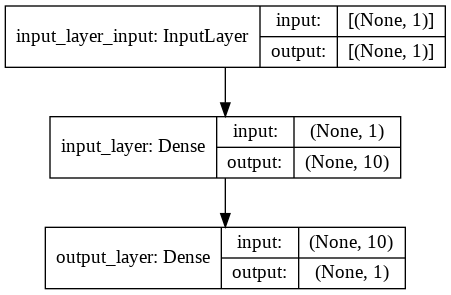

In [ ]:
#plotting our model
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes= True)

# Visualizing  the predictions

A good way to visulaise predictions is to plot them against the ground truth,i.e, against `y_test` or `y_true`



In [ ]:
 y_pred =  model.predict(X_test)

In [ ]:
y_pred

array([[ 72.428246],
       [ 76.58671 ],
       [ 80.74517 ],
       [ 84.903625],
       [ 89.06209 ],
       [ 93.22054 ],
       [ 97.379005],
       [101.53746 ],
       [105.69592 ],
       [109.854385]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#function to plot predictions:
def plot_predict(train_data =  X_train,
                 train_label = y_train,
                 test_data = X_test,
                 test_label =  y_test,
                 prediction =  y_pred):
  plt.figure(figsize = (12,10))
  plt.scatter(train_data,train_label, c = 'b' , label ='Train data') 
  plt.scatter(test_data,test_label, c = 'g' , label ='Test data') 
  plt.scatter(test_data,prediction, c = 'r' , label= "Predictions")
  plt.legend();


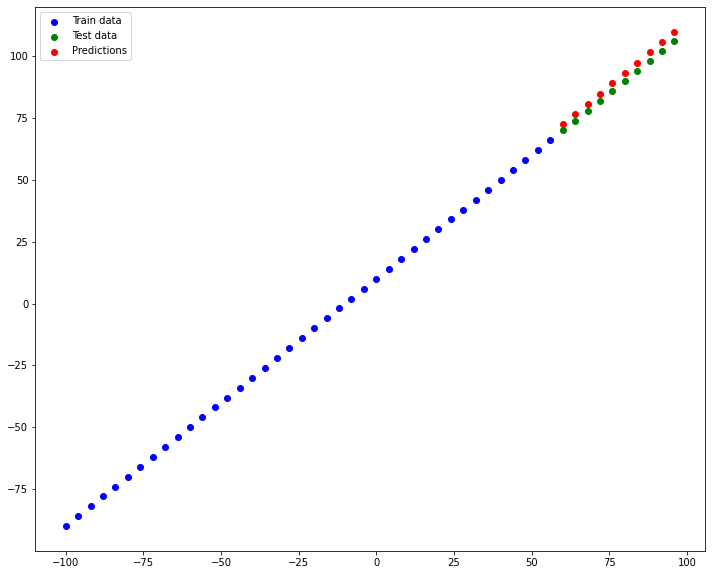

In [ ]:
plot_predict()

# Evaluating model predictions with regression evaluation metrics

1. MAE : Tells us on average, how outlandish/wrong are each of our model's predictions

2. MSE : When y_pred being 100 off from y_test is more significant than y_pred being 10 off form y_test ,i.e, when larger errors are more significant than smaller errors pay attention to MSE.



In [ ]:
#Evalaute model on test_data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 93ms/step - loss: 3.1413 - mae: 3.1413


[3.141315460205078, 3.141315460205078]

In [ ]:
#Calculate MAE
tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1413155>

In [ ]:
#Calculate MSE
tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=10.075015>

In [ ]:
def MAE(test_label = y_test, predict = y_pred):
  return tf.metrics.mean_absolute_error(test_label,tf.squeeze(tf.constant(predict)))

def MSE(test_label = y_test, predict = y_pred):
  return tf.metrics.mean_squared_error(test_label,tf.squeeze(tf.constant(predict)))

# Running experiments to improve our model performance

1. Get more data - getting more data samples for your model to train on ( this gives more opportunities to learn patterns between X and y)

2. Make your model larger - Increase no. of hidden layers and hidden units within the hidden layers

3. Train for longer


Modelling experiments:

* `model_1` - one layer trained for 100 epochs
* `model_2` -  2 layers trained for 100 epochs
* `model_3` -  3 layers trained for 500 epochs

In [ ]:
#build model_1
tf.random.set_seed(42)
model_1 =  tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss = 'mae', optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])

model_1.fit(X_train,y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

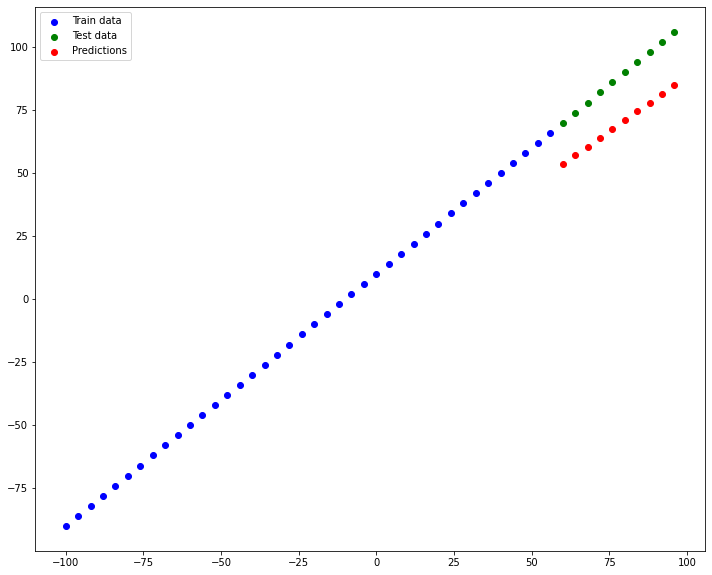

In [ ]:
#Making predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predict(prediction=y_pred_1)

In [ ]:
#Checking evaluation metrics for model_1
mae_1 = MAE(predict=y_pred_1)
mse_1 = MSE(predict= y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

In [ ]:
#Build model_2
tf.random.set_seed(42)
model_2 =  tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss = 'mae', optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])

model_2.fit(X_train,y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms/

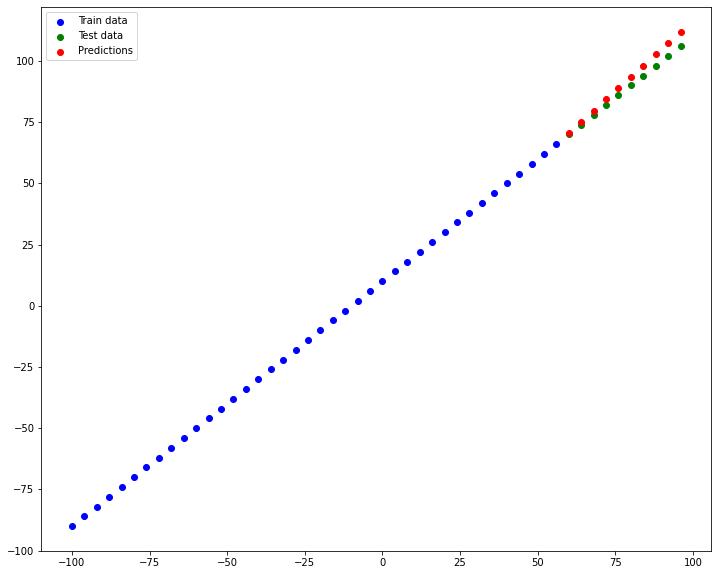

In [ ]:
#Making predictions for model_1
y_pred_2 = model_2.predict(X_test)
plot_predict(prediction=y_pred_2)

In [ ]:
#Checking evaluation metrics for model_1
mae_2 = MAE(predict=y_pred_2)
mse_2 = MSE(predict= y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

In [ ]:
#Build model_3
tf.random.set_seed(42)
model_3 =  tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss = 'mae', optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])

model_3.fit(X_train,y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 5ms/

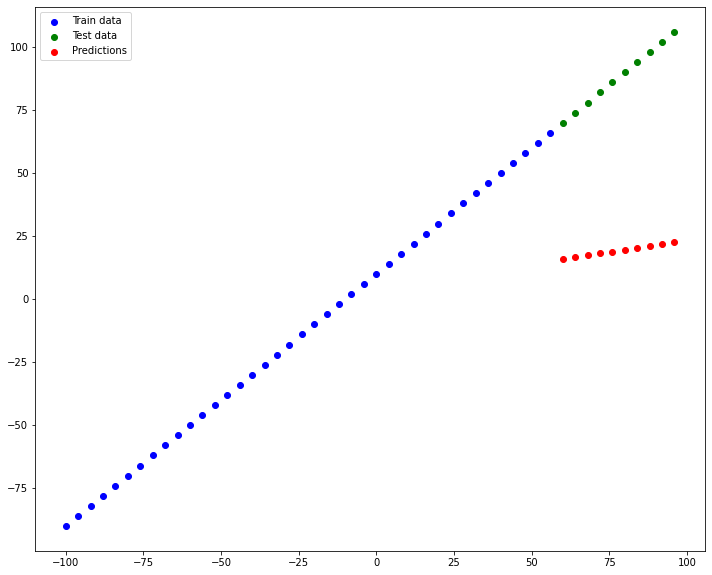

In [ ]:
#Making predictions for model_1
y_pred_3 = model_3.predict(X_test)
plot_predict(prediction=y_pred_3)

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
tf.squeeze(tf.constant(y_pred_3))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.854739, 16.617327, 17.379913, 18.142502, 18.905088, 19.667677,
       20.430264, 21.19285 , 21.955437, 22.718025], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Checking evaluation metrics for model_1
mae_3 = MAE(predict=y_pred_3)
mse_3 = MSE(predict= y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

# Now, let's compare the results of our experiments

In [ ]:
import pandas as pd

In [ ]:


model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

final_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
final_results

model        mae          mse
0  model_1  18.745327   353.573395
1  model_2   3.196947    13.070175
2  model_3  68.713623  4808.028320

In [ ]:
# From the above table, it is clear that model_2 outperformed model_1 and model_3
#Checking model summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


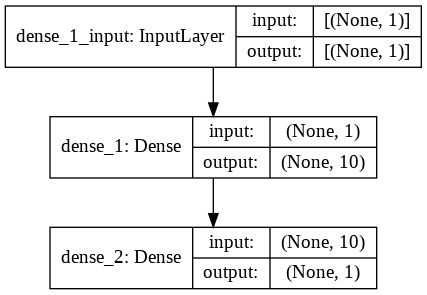

In [ ]:
#Plotting model_2
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes = True)

# Tracking your experiments

While performing ML modelling, it is a good habit to track the results of your experiments.

It is a tedious job and there are tools to help us with these tasks.

1.  `TensorBoard` - A component of Tensorflow library to track modelling experiments
2. `Weights & Biases` - A tool for tracking all kinds of ML experiments (plugs straight into TensorBoard)

## Saving our models

They are 2 formats for saving our models:
1. `SavedModelFormat`
2. `HDF5 format`

In [ ]:
#SavedModelFormat
model.save("mode1_2_SavedModelFormat")


INFO:tensorflow:Assets written to: mode1_2_SavedModelFormat/assets


In [ ]:
#HDFS Format
model_2.save("model_2_HDF5.h5")

## Loading the Saved Model

In [ ]:
laoded_model_HDF5 =  tf.keras.models.load_model("/content/model_2_HDF5.h5")

In [ ]:
laoded_model_HDF5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Comparing the predictions of our loaded model with originally saved model
model2_preds =  model_2.predict(X_test)
loaded_model_preds =  laoded_model_HDF5.predict(X_test)

In [ ]:
model2_preds == loaded_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Downlaod a model (or a file) from google colab
from google.colab import files
files.download("/content/model_2_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Working on a larger example:

Data Source link : https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
data.shape

(1338, 7)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
#One-hot encoding our dataframe

one_hot_data =  pd.get_dummies(data)

In [ ]:
one_hot_data.head()

age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 12 columns]

In [ ]:
#Create X and y values
X = one_hot_data.drop(['charges'], axis=1)
y = one_hot_data['charges']

In [ ]:
X.head()

age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 11 columns]

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
one_hot_data.shape

(1338, 12)

In [ ]:
X.shape,y.shape

((1338, 11), (1338,))

In [ ]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 42)
len(X), len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
X_train.shape

(1070, 11)

In [ ]:
#Building a neural network model (similar to model_2 we seen above)
tf.random.set_seed(42)

insurance_model =  tf.keras.Sequential([
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1)                                    
])

insurance_model.compile(loss = "mae",
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

In [ ]:
#Fit the model on train_data
insurance_model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [ ]:
#Evaluating our model on test_data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

> Here the mae is 7023,i.e, on average our model predictions are wrong/off by 7023, which is significant when compared with median and mean of the trained and test true values

In [ ]:
y_train.mean(),y_train.median()

(13346.089736364489, 9575.4421)

In [ ]:
y_test.mean(),y_test.median()

(12968.31706286941, 8487.8803)

# Improving our model

Lets' perform 2 experiments:
1. Add another hidden layer with more hidden units  and use Adam optimizer
2. Train for longer (maybe 200 epochs)


In [ ]:
# 1. Adding extra layer
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                     
]) 


insurance_model_2.compile(loss = "mae",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"]
                          )


In [ ]:
insurance_model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate new model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
#2. Training the insurance_model_ 2 for 200 epochs
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
       tf.keras.layers.Dense(100),
       tf.keras.layers.Dense(10),
       tf.keras.layers.Dense(1)

])

insurance_model_3.compile(loss = "mae",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

In [ ]:
history =  insurance_model_3.fit(X_train,y_train, epochs =  200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
#Evaluate
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'Epochs')

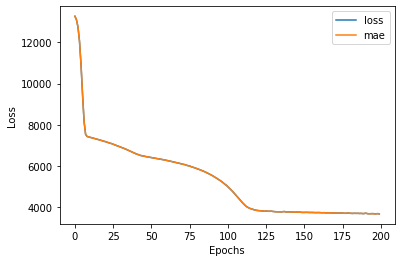

In [ ]:
#Plotting history ( also know as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

> How long should we train our model for?

It depends on the problem at hand. The solution tensorflow came up for the above problem is called **EarlyStopping Callback**, which is a tensorflow component you can add to your model to stop training once it stops improving a certain metric

In [ ]:
# Example of how it works
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss']) #only for epochs are run

4

In [ ]:
#Implementing Earlystopping Callback for our problem
tf.random.set_seed(42)

callback =  tf.keras.callbacks.EarlyStopping(monitor = 'loss' , patience=5)


ins_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model_4.compile(loss = "mae",
                    optimizer =  tf.keras.optimizers.Adam(),
                    metrics = ["mae"])

history = ins_model_4.fit(X_train,y_train, epochs = 500, callbacks = [callback])

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
len(history.history['loss']) #Out of 500 epochs only 302 run

302

Text(0.5, 0, 'epochs')

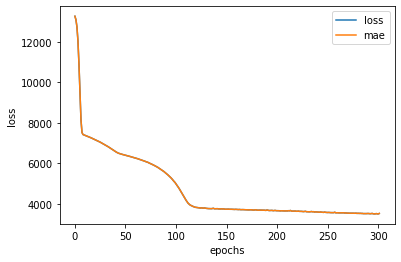

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
ins_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3248.2864 - mae: 3248.2864


[3248.286376953125, 3248.286376953125]

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

# Data Preprocessing step (NOrmalization and Standardization)

In [ ]:
X

age     bmi  ...  region_southeast  region_southwest
0      19  27.900  ...                 0                 1
1      18  33.770  ...                 1                 0
2      28  33.000  ...                 1                 0
3      33  22.705  ...                 0                 0
4      32  28.880  ...                 0                 0
...   ...     ...  ...               ...               ...
1333   50  30.970  ...                 0                 0
1334   18  31.920  ...                 0                 0
1335   18  36.850  ...                 1                 0
1336   21  25.800  ...                 0                 1
1337   61  29.070  ...                 0                 0

[1338 rows x 11 columns]

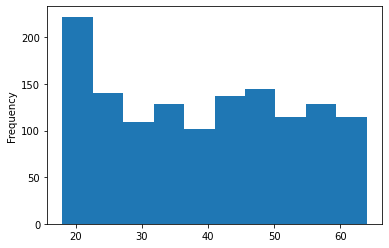

In [ ]:
X["age"].plot(kind = "hist")

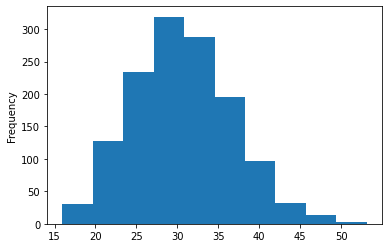

In [ ]:
X["bmi"].plot(kind = "hist")

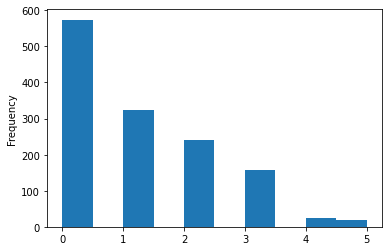

In [ ]:
X["children"].plot(kind = "hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
# Creating a column Transformer
col_transform  =  make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # Turn all values in these columns between 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

#Create X and y
X = df.drop("charges", axis = 1)
y  = df["charges"]

#Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

#Fitting column transformer to our train data
col_transform.fit(X_train)

#Transformation train data and test data with normalization and onehotencoding
X_train_normal = col_transform.transform(X_train)


In [ ]:
#Checking how our data looks like:
X_train

age     sex     bmi  children smoker     region
560    46  female  19.950         2     no  northwest
1285   47  female  24.320         0     no  northeast
1142   52  female  24.860         0     no  southeast
969    39  female  34.320         5     no  southeast
486    54  female  21.470         3     no  northwest
...   ...     ...     ...       ...    ...        ...
1095   18  female  31.350         4     no  northeast
1130   39  female  23.870         5     no  southeast
1294   58    male  25.175         0     no  northeast
860    37  female  47.600         2    yes  southwest
1126   55    male  29.900         0     no  southwest

[1070 rows x 6 columns]

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train_normal.shape , X_train.shape

((1070, 11), (1070, 6))

In [ ]:
#building a model with our normalized data (similar to insurance_model_2)
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                                    
])

insurance_model_4.compile(loss = "mae",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
X_test_normal = col_transform.transform(X_test)

In [ ]:
#Evaluating our model on normalized test data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
#Comparing the above results with our insurance_model_2 results
#insurance_model_2_results
#9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107

#Neural Network Classification Problem

A classification problem is something where to try to classify an entity into one thing or another.

Types of classification:
* Binary
* MultiClass
* MultiLabel

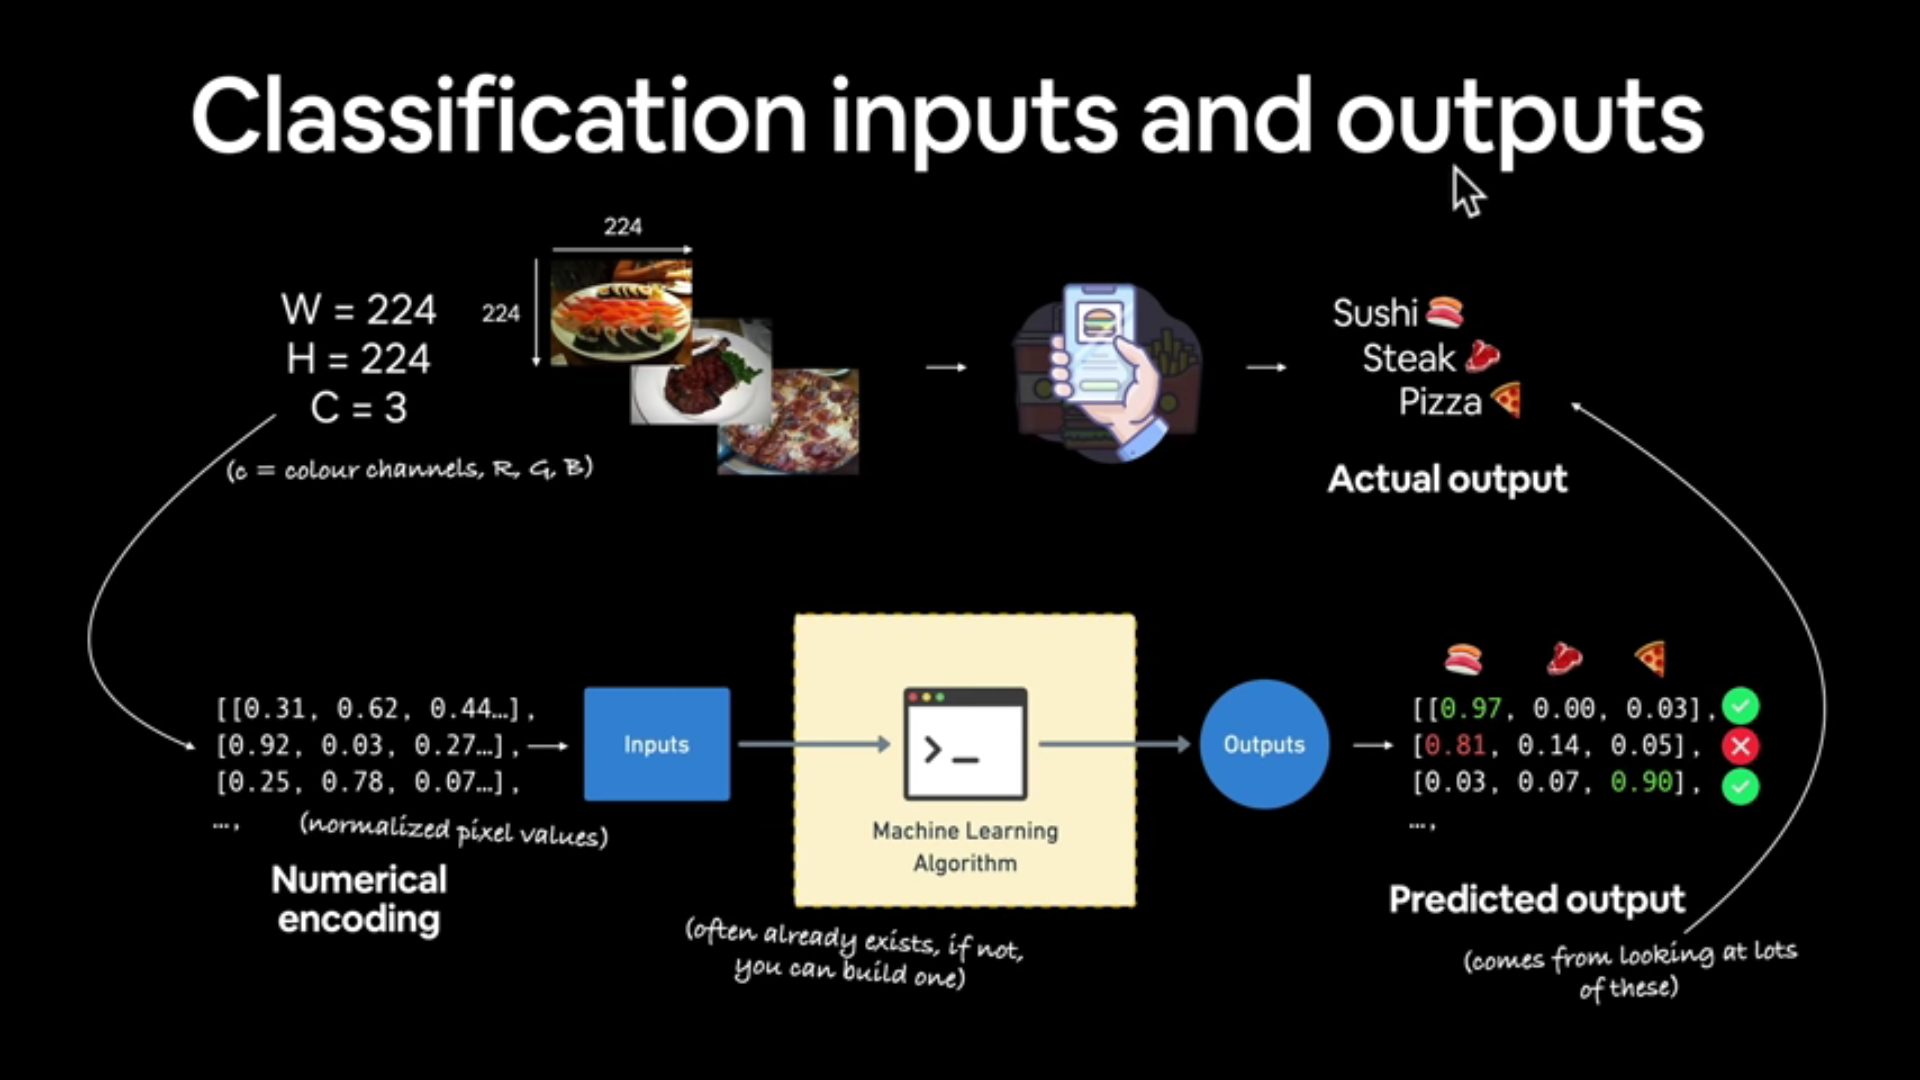

In [ ]:
#Create data to view it
from sklearn.datasets import make_circles

In [ ]:
samples =  1000
X,y = make_circles(n_samples= samples, noise = 0.03  ,random_state= 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data = pd.DataFrame({"X0": X[:,0], "X1":X[:,1] , "label" : y})

In [ ]:
data

X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

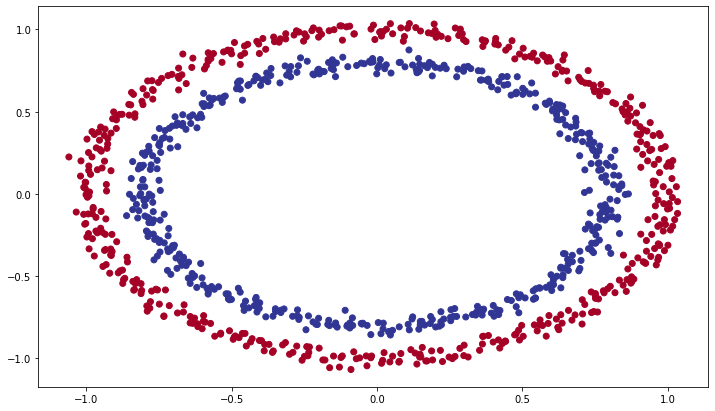

In [ ]:
#Visualizing the data
plt.figure(figsize = (12,7))
plt.scatter(X[:,0],X[:,1], c= y , cmap = "RdYlBu")

In [ ]:
#inspecting shapes of featrures and labels
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# Steps of modelling
# 1) Build a baseline model
tf.random.set_seed(42)

clf = tf.keras.Sequential([
      tf.keras.layers.Dense(1)                     
])

clf.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["accuracy"])

clf.fit(X,y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820


In [ ]:
# Trying to imporove our model by training for longer.
clf.fit(X,y, epochs = 200, verbose = 0)
#Evaluating our model
clf.evaluate(X,y)



32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Our model's accuracy even after getting 200 opportunities to go through the entire X and y values to interpret the underlying pattern
is ~50 percent which implies it is simply guessing the predictions



Find datasets to pracrice here : https://lionbridge.ai/training-data-guide/

In [ ]:
#Further improving our model
tf.random.set_seed(42)

clf_2 =  tf.keras.Sequential([
       tf.keras.layers.Dense(100),
       tf.keras.layers.Dense(10),
       tf.keras.layers.Dense(1)                       
])

clf_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer =  tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


clf_2.fit(X,y,epochs = 100, verbose = 0)

#Evaluate our improved model
clf_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. 
Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()`:

* It takes in a trained model, features (`X`) and labels (`y`).
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).
   




In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model,x,y):

  """
  plots a decision boundary created by a model predicting X.

  """
  # Defining the axis boundaries of the plot and creating a meshgrid
  x_min , x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  #Creating X values ( we make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()]  # Stack  2D arrays together


  #predictions
  y_pred =  model.predict(x_in)

  #check for mutli-class
  if (y_pred[0]) > 1:
    print("doing multiclass")
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #Plotting the decision boundary
  plt.contourf(xx,yy, y_pred, cmap = "RdYlBu", alpha = 0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s = 40 , cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())

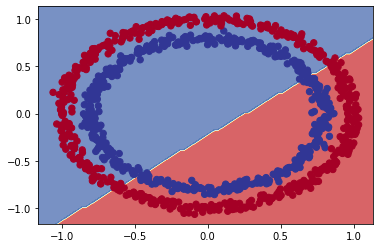

In [ ]:
#Checking out predictions made by our model
plot_decision_boundary(model = clf_2,x =  X, y =  y)

In [ ]:
#Our model is predicting a linear decision boundary, let's ee if our model can be used  for a regression problem

tf.random.set_seed(42)

#Data
X = tf.range(0,1000,5)
y  = X + 100

In [ ]:
X

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
       780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
       845, 850, 8

In [ ]:
y

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([ 100,  105,  110,  115,  120,  125,  130,  135,  140,  145,  150,
        155,  160,  165,  170,  175,  180,  185,  190,  195,  200,  205,
        210,  215,  220,  225,  230,  235,  240,  245,  250,  255,  260,
        265,  270,  275,  280,  285,  290,  295,  300,  305,  310,  315,
        320,  325,  330,  335,  340,  345,  350,  355,  360,  365,  370,
        375,  380,  385,  390,  395,  400,  405,  410,  415,  420,  425,
        430,  435,  440,  445,  450,  455,  460,  465,  470,  475,  480,
        485,  490,  495,  500,  505,  510,  515,  520,  525,  530,  535,
        540,  545,  550,  555,  560,  565,  570,  575,  580,  585,  590,
        595,  600,  605,  610,  615,  620,  625,  630,  635,  640,  645,
        650,  655,  660,  665,  670,  675,  680,  685,  690,  695,  700,
        705,  710,  715,  720,  725,  730,  735,  740,  745,  750,  755,
        760,  765,  770,  775,  780,  785,  790,  795,  800,  805,  810,
     

In [ ]:
X.shape,y.shape

(TensorShape([200]), TensorShape([200]))

In [ ]:
#Splitting into train and test
x_train =  X[:150]
x_test = X[150:]
y_train = y[:150]
y_test = y[150:]

In [ ]:
#Fitting to our model
clf_2.fit(x_train,y_train, epochs= 100)

Epoch 1/100


ValueError: ignored

In [ ]:
# The above error occured as our loss function and metrics is for a binary classification prob. not for a regression prob....let's change it

In [ ]:
tf.random.set_seed(42)

#Build a model (same as clf_2 but loss function and metrics as mae )
clf_3 =  tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)                      
])

clf_3.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])



In [ ]:
clf_3.fit(x_train,y_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

In [ ]:
#Evaluating our model on test data

clf_3.evaluate(x_test,y_test)


2/2 [==============================] - 0s 12ms/step - loss: 57.8962 - mae: 57.8962


[57.896209716796875, 57.896209716796875]

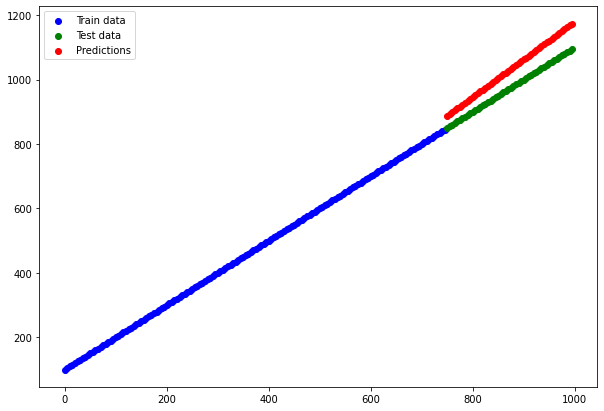

In [ ]:
# Plotting our predictions against true values

y_pred = clf_3.predict(x_test)

plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train, c = "b" , label = "Train data")
plt.scatter(x_test,y_test, c = "g" , label = "Test data")
plt.scatter(x_test,y_pred, c = "r" , label = "Predictions")
plt.legend()

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something.

There must be something we're missing out on for our classification problem. What could it be?

Answer : Our model's inability to capture **Non-linearity**

In [ ]:
#Data
X,y = make_circles(n_samples=1000, noise = 0.03, random_state = 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#Build model 4 with activation as linear, without any extra layers
tf.random.set_seed(42)

clf_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation="linear")                        
])

clf_4.compile(loss = "binary_crossentropy", 
              optimizer =  tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["accuracy"])



In [ ]:
history = clf_4.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

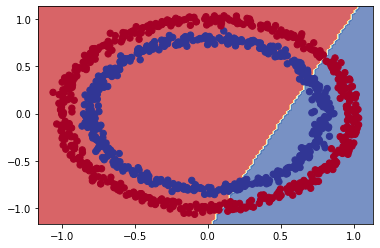

In [ ]:
#Plotting the decision boundary made by our new model
plot_decision_boundary(clf_4,X,y)

Text(0.5, 0, 'epochs')

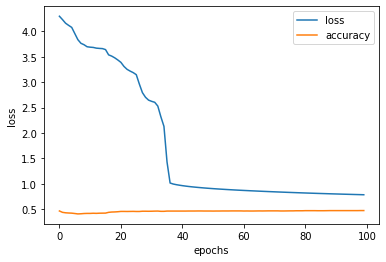

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(n_samples = 1000, noise = 0.03, random_state= 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

further improving our model by adding a non-linear activation function, more hidden layers and hidden nuerons and train for longer

In [ ]:
tf.random.set_seed(42)

clf_5 =  tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(1)

])


clf_5.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics = ["accuracy"])


history = clf_5.fit(X,y,epochs = 250)

Epoch 1/250
32/32 [==============================] - 3s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
#Evaluating the model
clf_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
import matplotlib.pyplot as plt


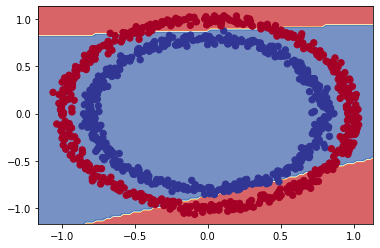

In [ ]:
#plotting the decision boundary
plot_decision_boundary(clf_5, X,y)

In [ ]:
# Add activation = sigmoid to our output layer
tf.random.set_seed(42)

clf_7 = tf.keras.Sequential([
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation  = "sigmoid")
])

clf_7.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["accuracy"])

clf_7.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
#Evaluating our model
clf_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

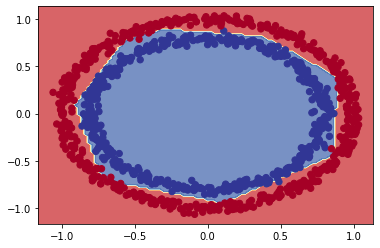

In [ ]:
#Plotting the decision boundary
plot_decision_boundary(clf_7,X,y)

 **Note:** The combination of linear and non-linear functions is key fundamentals of Neural Networks.

In [ ]:
#Let's understand linear and non-linear functions ( or lines).
A =tf.cast(tf.range(-10,10), dtype= tf.float32)

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

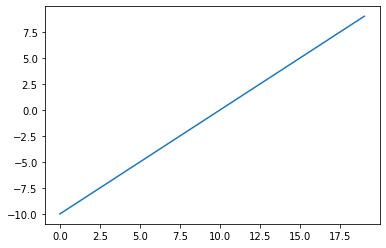

In [ ]:
plt.plot(A)

In [ ]:
#Let's apply sigmoid function to tensor A directly, sigmoid(x) =  1/ (1+ exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

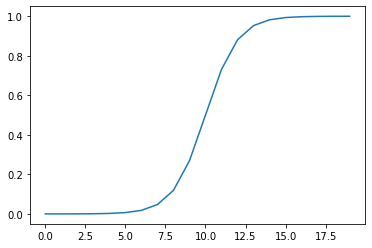

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
#let's apply relu to our tensor A
def relu(x):
  return tf.maximum(0,x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

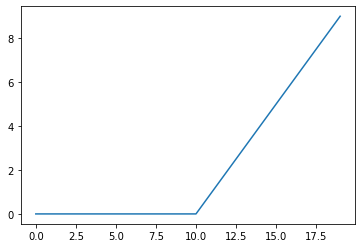

In [ ]:
plt.plot(relu(A))

In [ ]:
#tanh actiavtion function: tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))
def tanh(x):
  return tf.math.sinh(x)/tf.math.cosh(x)

In [ ]:
tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)>

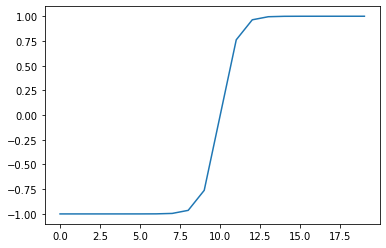

In [ ]:
plt.plot(tanh(A))

In [ ]:
#softmax : exp(x) / tf.reduce_sum(exp(x))
def softmax(x):
  return tf.exp(x)/tf.reduce_sum(tf.exp(x))


In [ ]:
softmax(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([3.5416430e-09, 9.6271835e-09, 2.6169397e-08, 7.1135801e-08,
       1.9336716e-07, 5.2562643e-07, 1.4288007e-06, 3.8838830e-06,
       1.0557488e-05, 2.8698232e-05, 7.8009878e-05, 2.1205282e-04,
       5.7641935e-04, 1.5668703e-03, 4.2591947e-03, 1.1577693e-02,
       3.1471431e-02, 8.5548222e-02, 2.3254417e-01, 6.3212061e-01],
      dtype=float32)>

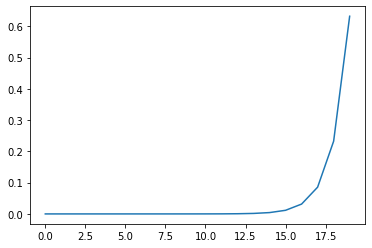

In [ ]:
plt.plot(softmax(A))

In [ ]:
#let's split the data, train the model on train_data and evaluate on test data
len(X)

1000

In [ ]:
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
#Build a model (same as clf_7 but we train for less time 25 epochs instead of 100 and increase lr from 0.001 to 0.01)
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
       tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(4,activation="relu"),
       tf.keras.layers.Dense(1,activation="sigmoid")                        
])

model_8.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])


In [ ]:
history = model_8.fit(X_train,y_train,epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
#Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

In [ ]:
import pandas as pd

Text(0.5, 1.0, 'Model_8 loss curves')

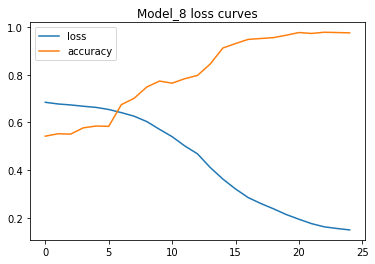

In [ ]:
#Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To find the optimal learning rate ( the lr where loss decreases the most during the training), we use the following steps:
1. Use a learnig rate **callback** - callback is an extra piece of functionality, you can add to your model while it is training.
2. A modified loss curve plot



In [ ]:
#Build a model same as model_8 but with a lr callback
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(4,activation="relu"),
              tf.keras.layers.Dense(1,activation ="sigmoid")
])

model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])





#learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 ** (epoch/20))


hist_9 = model_9.fit(X_train,y_train,epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

Text(0.5, 0, 'epoch')

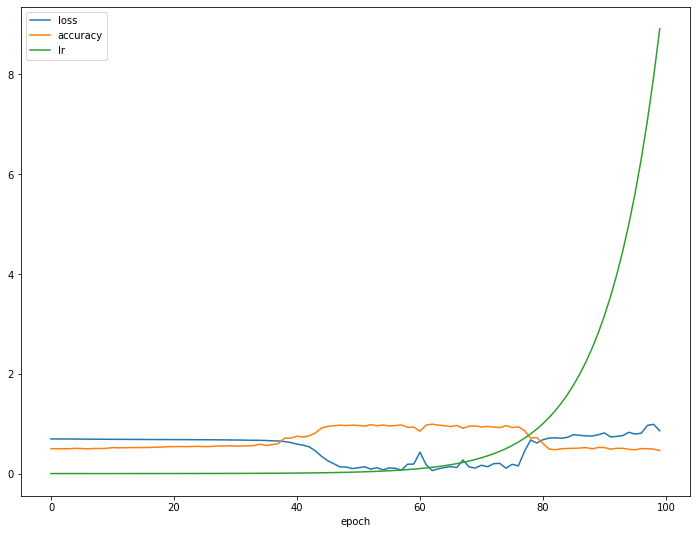

In [ ]:
#plotting loss curve
pd.DataFrame(hist_9.history).plot(figsize =(12,9))
plt.xlabel("epoch")

In [ ]:
tf.range(100)

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32)>

Text(0.5, 1.0, 'learning_rate vs loss')

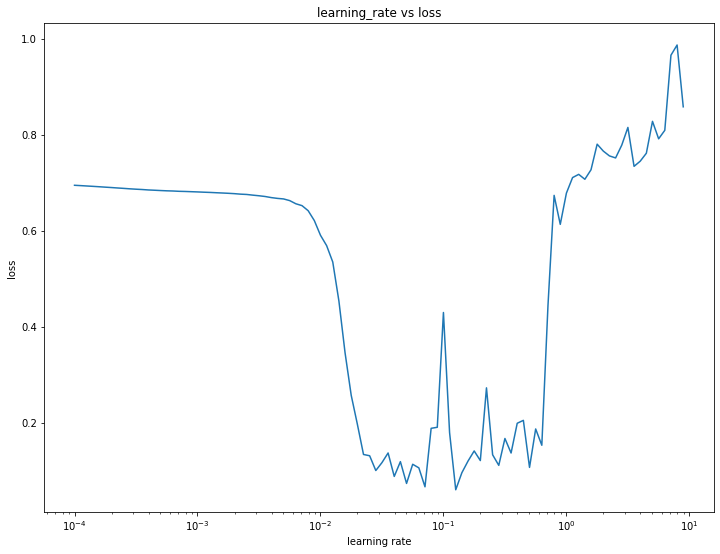

In [ ]:
#Plot the learning rate versus the loss
lr = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(12,9))
plt.semilogx(lr,hist_9.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning_rate vs loss")

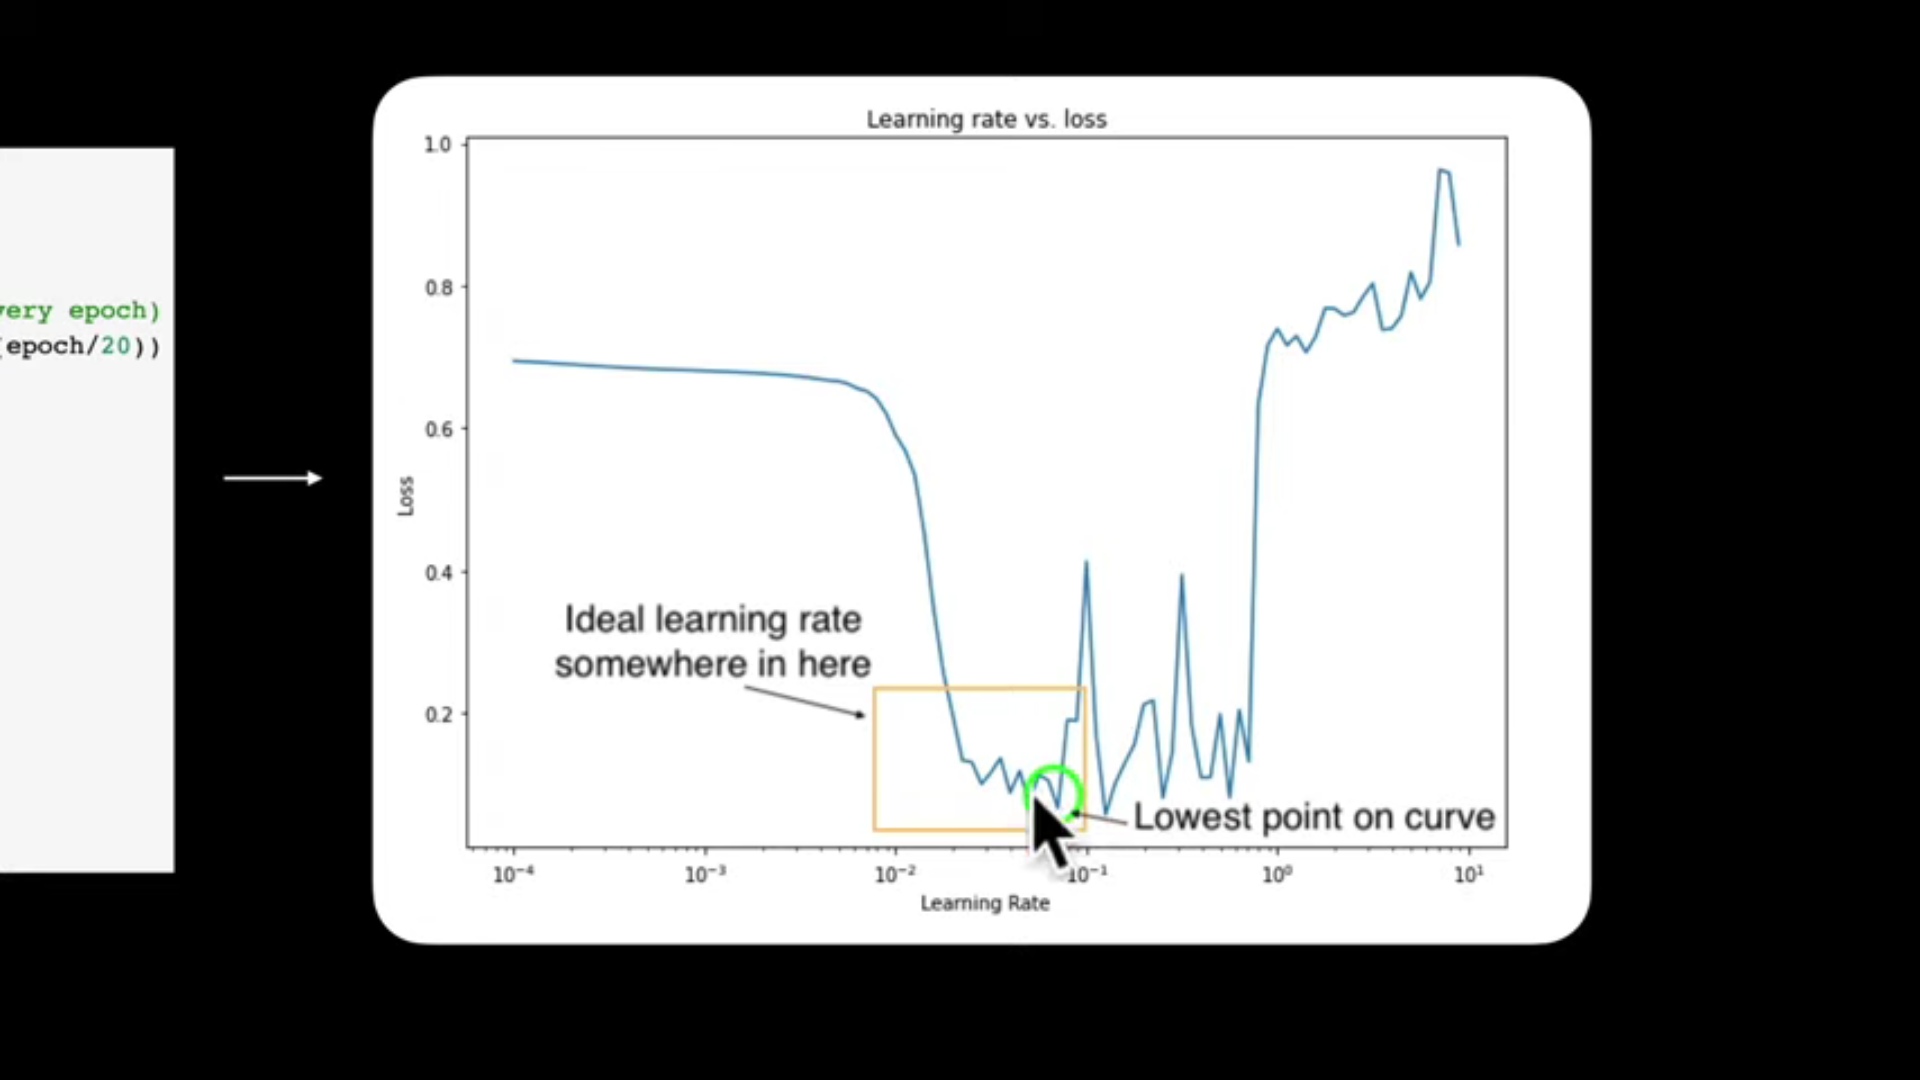

The ideal learning rate is somewhere bewteen 10^-2 and 10^-1, let's build a model with a lr = 0.02, which is a higher optimal learning rate than 10^-2 (0.01) and check the results

In [ ]:
tf.random.set_seed(42)

model_10 =  tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model_10.compile(loss =  "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics = ["accuracy"])
model_10.fit(X_train,y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
# evaluate our model
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

#Classification Evaluation Metrics


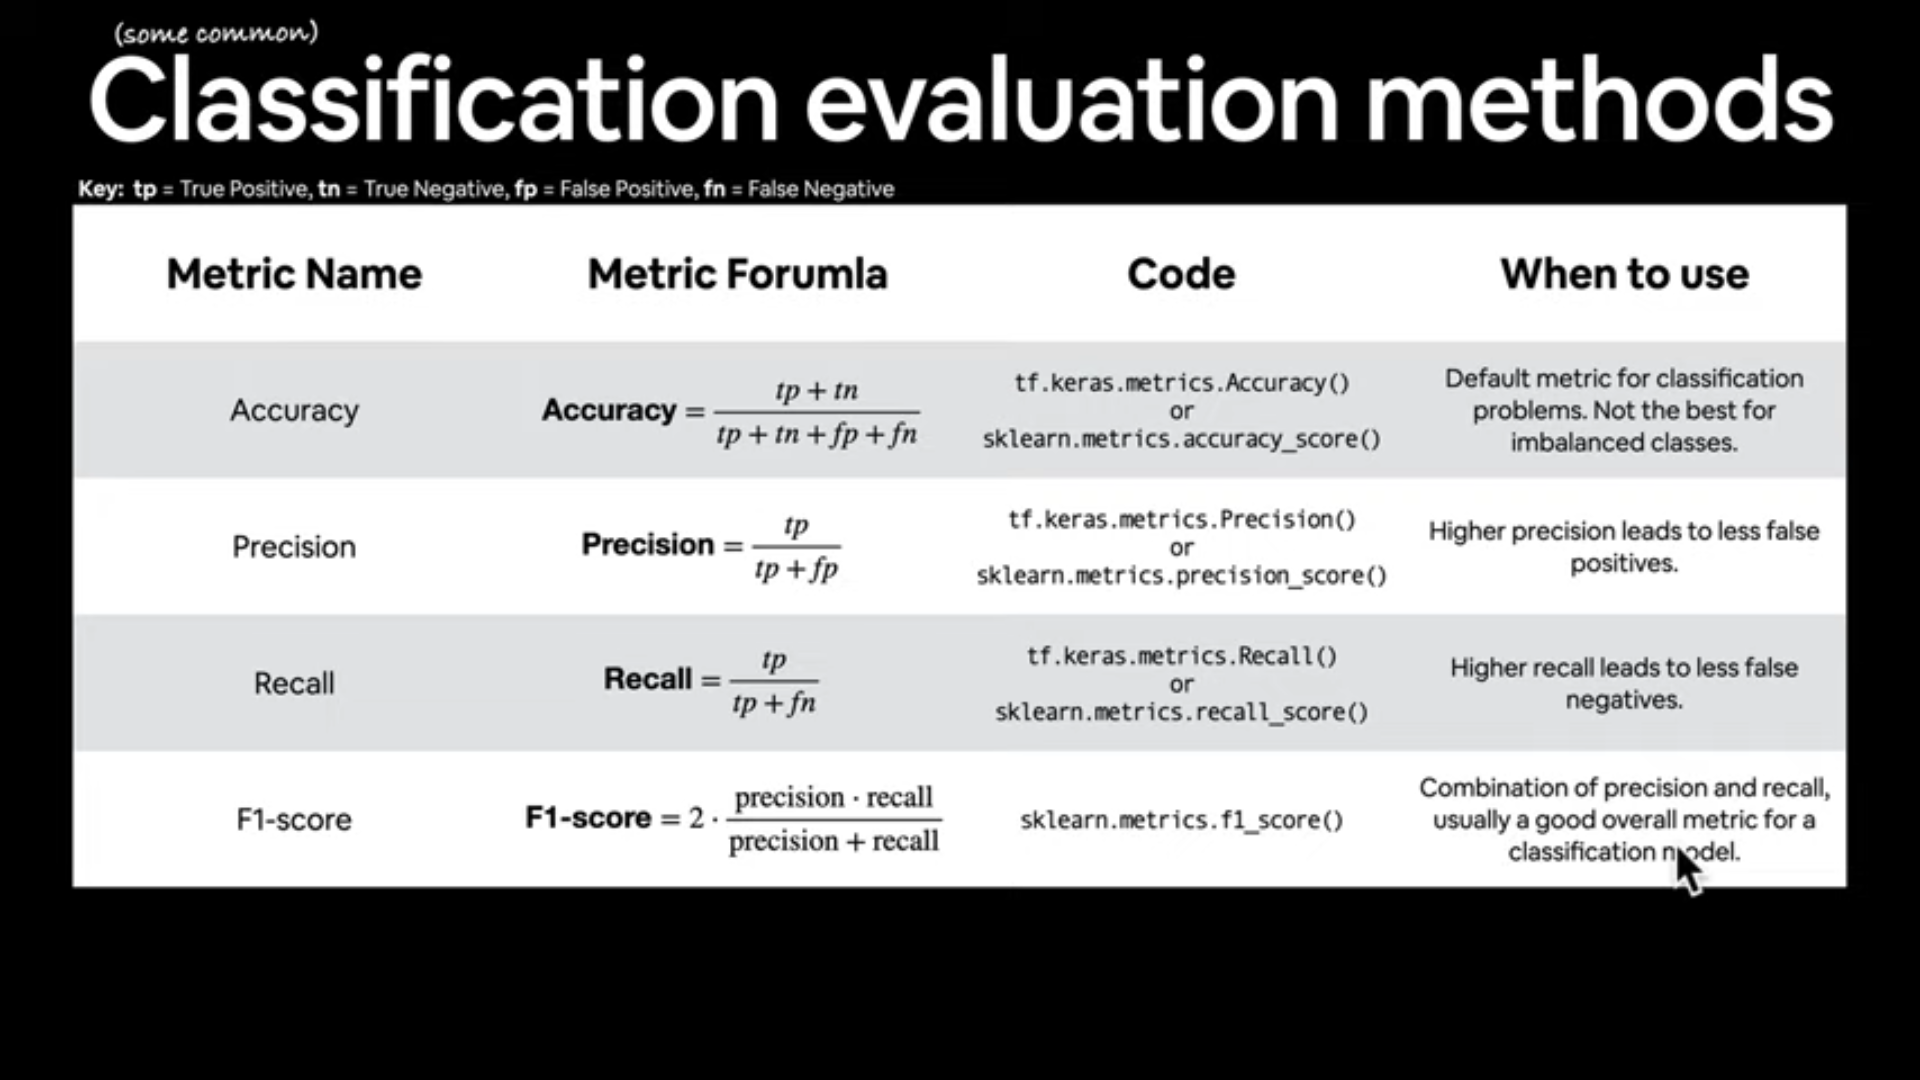

In [ ]:
#1 Accuracy 
loss, accuracy =  model_10.evaluate(X_test,y_test)
print(f"The accuracy of the model is {(accuracy*100): .2f}%") 

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
The accuracy of the model is  99.00%


In [ ]:
y_pred = model_10.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [ ]:
y_pred = tf.cast(tf.squeeze(y_pred), dtype = tf.int64)

In [ ]:
y_pred.shape

TensorShape([200])

In [ ]:
y_pred

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])>

In [ ]:
y_pred.numpy()

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
#2 precision
m = tf.keras.metrics.Precision()

In [ ]:
m.update_state(y_test,y_pred.numpy())

In [ ]:
m.result().numpy()

0.980198

In [ ]:
#3 Recall 
r = tf.keras.metrics.Recall()
r.update_state(y_test,y_pred.numpy())
r.result().numpy()

1.0

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred.numpy())
cm

array([[99,  2],
       [ 0, 99]])

## Multiclass Classification

When you have more than 2 classes as an option for a each input sample,it is known as **multi-class classification.**

In this section, we will build a neural network to classify images of different items of clothings.

Dataset : Fashion MNIST

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# The dataset is already split into train and test data for us
(train_data,train_labels),(test_data,test_labels) =  fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_labels[0]

9

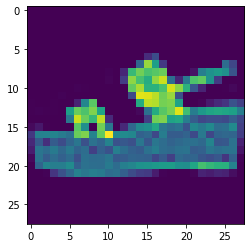

In [ ]:
#plotting a single sample
plt.imshow(train_data[12])

In [ ]:
train_labels[12]

5

Label	Description
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boo

In [ ]:
#creating a list so that we can index onto our training labels
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

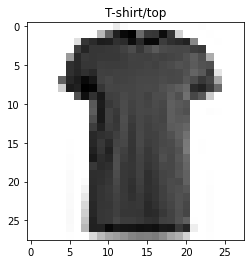

In [ ]:
#Plot and example with its class
index = 17
plt.imshow(train_data[index],cmap = plt.cm.binary)
plt.title(classes[train_labels[index]])

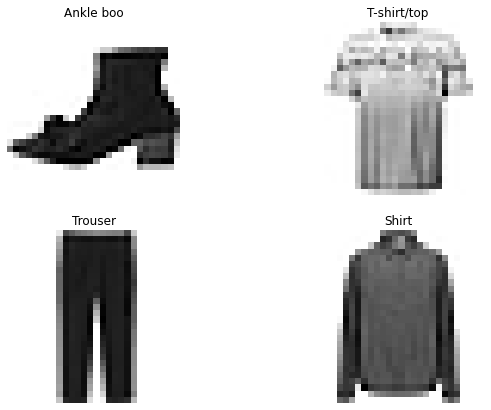

In [ ]:
#Plotting random images at once
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  random_index =  random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.binary)
  plt.title(classes[train_labels[random_index]])
  plt.axis(False)

## Build a mutli-class classification model

Things to consider

* Input shape - 28x28 (the shape of one image)
* Output shape - 10 (one value per class of clothing)
* Loss function - categorical crossentropy

   1. If output labels are one-hot encoded use categorical 
   crossentropy
   2. If output labels are integers use SparseCategorical 
   crossentropy 
* Output activation function - Softmax (not sigmoid)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape = (28,28)),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(4,activation = "relu"),
   tf.keras.layers.Dense(10,activation="softmax")                          
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

non_norm_history =  model.fit(train_data,
                              train_labels,
                              epochs = 10,
                              validation_data = (test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

Text(0.5, 0, 'Epochs')

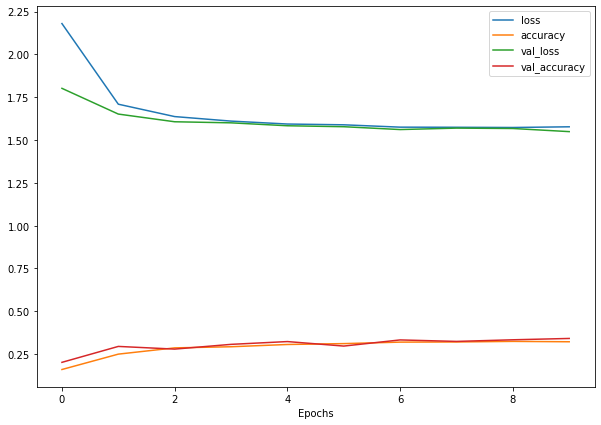

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(figsize =(10,7))
plt.xlabel("Epochs")


# Normalizing the pixel values

Neural networks tend to prefer normalized data,i.e, they like to have numbers in tensors they try to find patterns between 0 & 1.

In [ ]:
#Check min and max of train_data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
#We can normalize our train and test data by divinding max value of 255
train_norm = train_data/255.0
test_norm =  test_data/255.0


In [ ]:
train_norm.min(),train_norm.max()

(0.0, 1.0)

In [ ]:
#Build model with normalized data
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (28,28)),
     tf.keras.layers.Dense(4, activation= "relu"),
     tf.keras.layers.Dense(4,activation ="relu"),
     tf.keras.layers.Dense(10,activation = "softmax")                          
])


model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer =  tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

norm_history = model_1.fit(train_norm,
                         train_labels,
                         epochs = 10,
                         validation_data = (test_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Text(0.5, 0, 'Epochs')

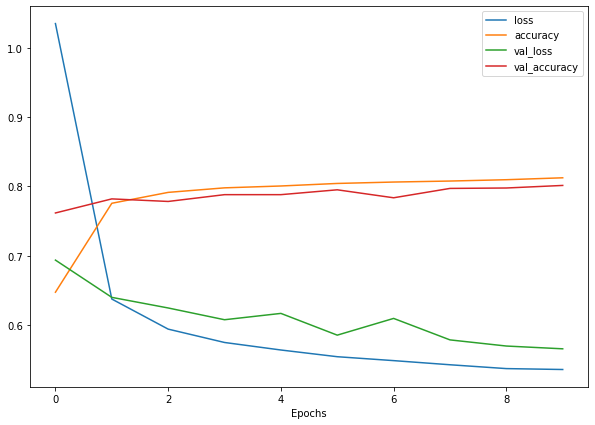

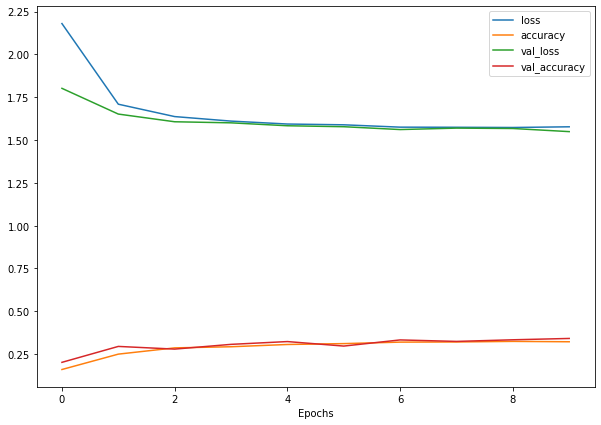

In [ ]:
#Plot the loss curve
import pandas as pd
pd.DataFrame(norm_history.history).plot(figsize =(10,7))
plt.xlabel("Epochs")



pd.DataFrame(non_norm_history.history).plot(figsize =(10,7))
plt.xlabel("Epochs")


>  **Note**: The same model with even slightly different data can produce **dramatically** different results, it is important to make sure that you are comparing them on the **same criteria**.(Eg: same data different architecture or same architecture different data)

In [ ]:
#Finding the ideal learning rate
tf.random.set_seed(42)

model_2 =  tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax")                           
])

model.compile(loss =  tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

lr_history = model.fit(train_norm,
                       train_labels,
                       epochs = 40, 
                       validation_data = (test_norm, test_labels),
                       callbacks = [lr_schedule])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6538 - accuracy: 0.3186 - val_loss: 1.4565 - val_accuracy: 0.3605
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4162 - accuracy: 0.3849 - val_loss: 1.3752 - val_accuracy: 0.4038
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3480 - accuracy: 0.4180 - val_loss: 1.3206 - val_accuracy: 0.4423
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3152 - accuracy: 0.4428 - val_loss: 1.2999 - val_accuracy: 0.4581
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2917 - accuracy: 0.4645 - val_loss: 1.2568 - val_accuracy: 0.4939
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2207 - accuracy: 0.5041 - val_loss: 1.1829 - val_accuracy: 0.5224
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1815 - accuracy: 0.5149 - val_loss: 1.1601 - val_accuracy:

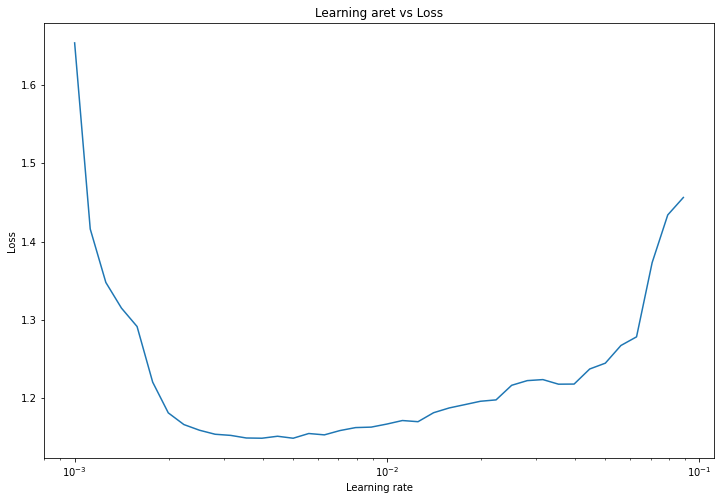

In [ ]:
#Plot learning rate vs loss
lr = 1e-3 * 10 ** (tf.range(40)/20)
plt.figure(figsize=(12,8))
plt.semilogx(lr, lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning aret vs Loss")
plt.show()

From the above figure the ideal learning rate is 10^-3 ,i.e, 0.001

In [ ]:
#Building model with ideal learning rate
tf.random.set_seed(42)

model_3 =  tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (28,28)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")                          
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
history_3 =  model_3.fit(train_norm,
                       train_labels,
                       epochs = 20,
                       validation_data = (test_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

#Evaluate our model

1. Evaluate the performanc eof our mdoel using classification metrics(confusion matrix)
2. Assess predictions via visualizations
3. Improve the results further ( increase epochs or change in architecture)
4. Save the model

In [ ]:
#predicting our model predictions on test_norm data
y_probs =  model_3.predict(test_norm)  #y_prob is predicted probabilities

In [ ]:
y_probs[0], tf.argmax(y_probs[0]) , classes[tf.argmax(y_probs[0])]

(array([8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
#Converting probabilties to integers
y_pred  = y_probs.argmax(axis = 1)

In [ ]:
#Checking if the first 10 predictions match the actual classes
y_pred[:10] == test_labels[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
#1 Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,y_pred)
cm

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [ ]:
loss,accuracy =  model_3.evaluate(test_norm,test_labels)
print(f"loss : {(loss*100):.2f}% \n")
print(f"model accuracy : {(accuracy*100):.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.8075
loss : 56.60% 

model accuracy : 80.75%


In [ ]:
#2 Assess the predictions via visualizations

Let's create a function:
1. To plot a random image
2. Make a prediction on the random image
3. Label the plot with truth and the prediction

In [ ]:
model_3.predict(test_norm[10])

ValueError: ignored

In [ ]:
import random

In [ ]:


def plot_prediction_label(model,test_data,true_labels,predict,rand_index):
 
  plt.figure(figsize=(12,7))
  plt.subplot(1,2,1)
  plt.title(classes[true_labels[rand_index]])
  plt.imshow(test_data[rand_index], cmap = plt.cm.binary)

  plt.subplot(1,2,2)
  plt.title(classes[predict[rand_index]])
  plt.imshow(test_data[rand_index], cmap = plt.cm.binary)



  

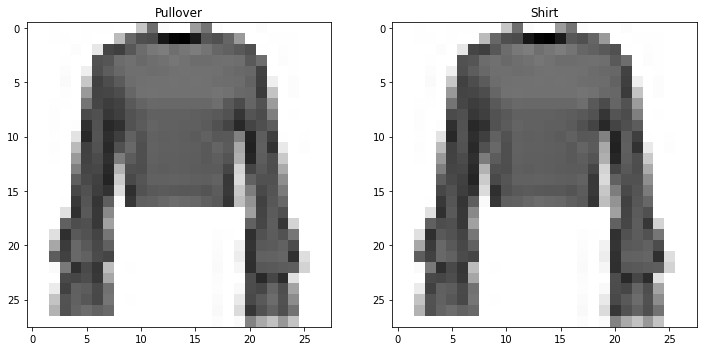

In [ ]:
random_value =  random.choice(range(len(test_norm)))
plot_prediction_label(model_3,test_norm, test_labels,y_pred, random_value)

#Checking out the patterns learned by our model

In [ ]:
#Find the layers of latest model
model_3.layers

In [ ]:
#Extract a layer
model_3.layers[1]

In [ ]:
#Get the patterns learned by that layer
weights,biases =  model_3.layers[1].get_weights()

In [ ]:
#Shapes
weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [ ]:
biases.shape, biases

((4,), array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32))

In [ ]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
w,b = model_3.layers[2].get_weights()

In [ ]:
w.shape,b.shape

((4, 4), (4,))

In [ ]:
w

array([[ 1.0736772 , -0.19358201,  0.5072541 , -0.35606664],
       [ 0.3489816 ,  1.1341445 ,  0.8430501 ,  0.55265594],
       [ 0.09337568,  0.4624761 , -0.69962734,  0.58674884],
       [-0.3245145 , -0.21780188,  0.5666561 ,  1.2752371 ]],
      dtype=float32)

In [ ]:
b

array([-0.65087706, -0.28385487,  0.28233278, -0.37909952], dtype=float32)

In [ ]:
w1,b1 =  model_3.layers[3].get_weights()
w1.shape,b1.shape

((4, 10), (10,))

In [ ]:
w1

array([[ 6.9160186e-02,  6.4639318e-01, -3.9049530e-01,  3.7304601e-01,
        -2.2637779e-04, -2.3872135e+00, -9.5197707e-02, -1.8055779e+00,
        -2.0402752e-01, -1.1468065e+00],
       [-5.1763368e-01, -4.5929560e-01,  2.1697341e-01, -7.9939508e-01,
         4.9219191e-01,  5.8288071e-03,  1.9442511e-01,  7.7441519e-01,
        -5.5389130e-01,  1.0574620e+00],
       [ 3.8030669e-01, -1.0223563e+00,  5.7725435e-01, -3.2344359e-01,
        -7.9921171e-02,  6.5496486e-01,  4.4482327e-01, -1.7416942e+00,
        -7.4833900e-02, -2.6719752e-01],
       [-5.9421599e-01, -7.0532888e-01, -3.1279865e-01,  1.2861671e-01,
        -2.9946682e-01,  4.4357952e-01, -6.6629934e-01,  5.2147686e-01,
         7.4767762e-01,  1.4950146e-01]], dtype=float32)

In [ ]:
b1 

array([ 0.59708905,  1.6234425 , -0.3439978 ,  0.26866165, -1.1116446 ,
        2.0471714 ,  0.19684877,  1.393179  , -1.854508  , -2.2367315 ],
      dtype=float32)

#Bias
Every nueron has a bias vector which gets paired with weights matrix.

They are initialized as zeroes (at least inn case of Tensorflow Dense layer)

The bias vector dictates how much the patterns within the weights matrix should influence the next layer in the neural network

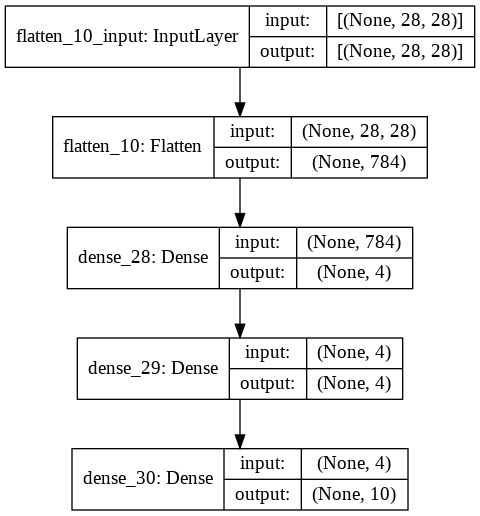

In [ ]:
#plot the model_3
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes = True)